In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 10
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"

  # IPython 7.14 deprecated set_matplotlib_formats from IPython
  try:
    from matplotlib_inline.backend_inline import set_matplotlib_formats
  except ImportError:
    # Fall back to deprecated location for older IPython versions
    from IPython.display import set_matplotlib_formats
    
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL2pvaG5jaGVuL0RvY3VtZW50cy9Tb2x1dGlvbnMvY291cnNlLXdlYnNpdGUvc2xpZGVzLzA1'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/importlib/_bootstrap.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/importlib/_bootstrap_external.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/zipimport.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/codecs.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/encodings/aliases.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/encodings/__init__.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/encodings/utf_8.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.

In [2]:
#| label: setup

# Import all required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
import mord as m
import xgboost as xgb
import tensorflow as tf
import logging
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import os

# Increase font size of all Seaborn plot elements
sns.set(font_scale = 1.25)

# Set Seaborn theme
sns.set_theme(style = "white")

# Suppress tensorflow messages and progress bars 
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  

In [3]:
#| code-fold: true
loans = pd.read_csv("data/loans.csv")

# Pandas options to print everything
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
loans.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,installment,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,0,38.0,2001,6,28,10,70795,38767,0,0,38.0,0,1250,2,5,5.0,10,0.0,0,2,11100,14,8,6,1,92.9,0,0,moving,individual,28000,60,14.07,652.53,C,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,0,NaN,1996,1,30,14,28800,4321,0,1,NaN,0,0,0,11,8.0,14,0.0,0,3,16500,24,14,4,0,100.0,0,1,debt_consolidation,individual,5000,36,12.61,167.54,C,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,0,28.0,2006,4,31,10,24193,16000,0,0,28.0,0,432,1,13,7.0,10,0.0,0,3,4300,14,8,6,0,93.5,0,0,other,individual,2000,36,17.09,71.40,D,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,0,NaN,2007,0,4,4,25400,4997,0,1,NaN,0,0,1,1,15.0,4,0.0,0,2,19400,3,3,2,0,100.0,1,0,debt_consolidation,individual,21600,36,6.72,664.19,A,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,0,NaN,2008,7,22,16,69839,52722,0,0,NaN,0,0,1,6,4.0,16,0.0,0,10,32700,20,15,13,0,100.0,0,0,credit_card,joint,23000,36,14.07,786.87,C,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


In [5]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        9183 non-null   float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    9976 non-null   float64
 7   annual_income_joint               1495 non-null   float64
 8   verification_income_joint         1455 non-null   object 
 9   debt_to_income_joint              1495 non-null   float64
 10  delinq_2y                         10000 non-null  int64  
 11  months_since_last_delinq          4342 non-null   float64
 12  earli

In [6]:
loans.describe().round(3)

,emp_length,annual_income,debt_to_income,annual_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees
count,9183.000,10000.000,9976.000,1495.000,1495.000,10000.000,4342.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,2285.000,10000.00,10000.000,10000.000,10000.000,8729.000,10000.00,9682.0,10000.00,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,5.930,79222.148,19.308,127914.571,19.979,0.216,36.761,2001.290,1.958,22.680,11.404,183606.230,51049.063,0.014,0.167,46.112,0.00,184.334,2.664,4.376,7.341,11.38,0.0,0.00,3.595,27357.410,13.030,8.095,5.230,1.383,94.649,0.043,0.124,16361.922,43.272,12.428,476.205,14458.917,2494.235,1894.448,599.667,0.120
std,3.704,64734.290,15.005,70168.375,8.055,0.684,21.635,7.796,2.380,11.885,5.868,187632.708,53636.731,0.127,0.688,21.748,0.01,2206.390,2.935,3.159,5.982,5.86,0.0,0.01,2.435,26570.164,7.875,4.907,3.328,1.717,9.155,0.594,0.337,10301.957,11.030,5.001,294.852,9964.562,3958.230,3884.407,517.328,1.813
min,0.000,0.000,0.000,19200.000,0.320,0.000,1.000,1963.000,0.000,2.000,0.000,0.000,0.000,0.000,0.000,2.000,0.00,0.000,0.000,0.000,0.000,0.00,0.0,0.00,0.000,0.000,2.000,0.000,0.000,0.000,14.300,0.000,0.000,1000.000,36.000,5.310,30.750,0.000,0.000,0.000,0.000,0.000
25%,2.000,45000.000,11.058,86833.500,14.160,0.000,19.000,1997.000,0.000,14.000,7.000,51593.750,19185.500,0.000,0.000,29.000,0.00,0.000,1.000,2.000,2.000,7.00,0.0,0.00,2.000,10000.000,7.000,5.000,3.000,0.000,92.600,0.000,0.000,8000.000,36.000,9.430,256.040,6679.065,928.700,587.100,221.758,0.000
50%,6.000,65000.000,17.570,113000.000,19.720,0.000,34.000,2003.000,1.000,21.000,10.000,114667.000,36927.000,0.000,0.000,47.000,0.00,0.000,2.000,4.000,6.000,10.00,0.0,0.00,3.000,19500.000,11.000,7.000,5.000,1.000,100.000,0.000,0.000,14500.000,36.000,11.980,398.420,12379.495,1563.300,984.990,446.140,0.000
75%,10.000,95000.000,25.002,151545.500,25.500,0.000,53.000,2006.000,3.000,29.000,14.000,267550.000,65421.000,0.000,0.000,63.000,0.00,0.000,3.000,6.000,11.000,14.00,0.0,0.00,5.000,36100.000,17.000,10.000,7.000,2.000,100.000,0.000,0.000,24000.000,60.000,15.050,644.690,20690.182,2616.005,1694.555,825.420,0.000
max,10.000,2300000.000,469.090,1100000.000,39.980,13.000,118.000,2015.000,29.000,87.000,51.000,3386034.000,942456.000,3.000,52.000,128.000,1.00,199308.000,35.000,29.000,24.000,51.00,0.0,1.00,32.000,386700.000,66.000,46.000,43.000,14.000,100.000,52.000,3.000,40000.000,60.000,30.940,1566.590,40000.000,41630.444,40000.000,4216.440,52.980


In [7]:
loans.describe(exclude = [np.number])

,emp_title,state,homeownership,verified_income,verification_income_joint,loan_purpose,application_type,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method
count,9167,10000,10000,10000,1455,10000,10000,10000,10000,10000,10000,10000,10000
unique,4741,50,3,3,3,12,2,7,32,3,6,2,2
top,manager,CA,MORTGAGE,Source Verified,Not Verified,debt_consolidation,individual,B,B1,Mar-2018,Current,whole,Cash
freq,218,1330,4789,4116,611,5144,8505,3037,647,3617,9375,8206,9284


In [8]:
#| code-fold: true
categorical_cols = loans.select_dtypes(include = ['object', 'category']).columns

category_analysis = {}

for col in categorical_cols:
    counts = loans[col].value_counts()
    proportions = loans[col].value_counts(normalize=True)
    unique_levels = loans[col].unique()
    
    category_analysis[col] = {
        'Unique Levels': unique_levels,
        'Counts': counts,
        'Proportions': proportions.round(3)
    }

for col, data in category_analysis.items():
    print(f"Analysis for {col}:\n")
    print("Unique Levels:", data['Unique Levels'])
    print("\nCounts:\n", data['Counts'])
    print("\nProportions:\n", data['Proportions'])
    print("\n" + "-"*50 + "\n")

Analysis for emp_title:

Unique Levels: ['global config engineer ' 'warehouse office clerk' 'assembly' ...
 'inspector/packer' 'da coordinator ' 'toolmaker']

Counts:
 emp_title
manager                                     218
owner                                       204
teacher                                     201
driver                                      123
sales                                        97
registered nurse                             88
rn                                           80
supervisor                                   79
truck driver                                 63
office manager                               61
president                                    54
general manager                              51
project manager                              50
engineer                                     46
director                                     46
operations manager                           43
nurse                                        33
softwa

In [9]:
total_rows = len(loans)

missing_values = loans.isna().sum()
missing_percentage = (missing_values / total_rows) * 100

missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})

missing_data

,Missing Values,Percentage (%)
emp_title,833,8.33
emp_length,817,8.17
state,0,0.00
homeownership,0,0.00
annual_income,0,0.00
verified_income,0,0.00
debt_to_income,24,0.24
annual_income_joint,8505,85.05
verification_income_joint,8545,85.45
debt_to_income_joint,8505,85.05


In [10]:
#| code-fold: true

dataCopy = loans.copy()

dataRed = dataCopy.select_dtypes(include = np.number)

dataRedColsList = dataRed.columns[...]

for i_col in dataRedColsList:
  dataRed_i = dataRed.loc[:,i_col]
  
  q25, q75 = round((dataRed_i.quantile(q = 0.25)), 3), round((dataRed_i.quantile(q = 0.75)), 3)
  
  IQR = round((q75 - q25), 3)
  
  cut_off = IQR * 1.5
  
  lower, upper = round((q25 - cut_off), 3), round((q75 + cut_off), 3)
  
  print(' ')
  
  print(i_col, 'q25 =', q25, 'q75 =', q75, 'IQR =', IQR)
  
  print('lower, upper:', lower, upper)

  print('Number of Outliers: ', dataRed_i[(dataRed_i < lower) | (dataRed_i > upper)].count())

 
emp_length q25 = 2.0 q75 = 10.0 IQR = 8.0
lower, upper: -10.0 22.0
Number of Outliers:  0
 
annual_income q25 = 45000.0 q75 = 95000.0 IQR = 50000.0
lower, upper: -30000.0 170000.0
Number of Outliers:  508
 
debt_to_income q25 = 11.058 q75 = 25.002 IQR = 13.944
lower, upper: -9.858 45.918
Number of Outliers:  221
 
annual_income_joint q25 = 86833.5 q75 = 151545.5 IQR = 64712.0
lower, upper: -10234.5 248613.5
Number of Outliers:  68
 
debt_to_income_joint q25 = 14.16 q75 = 25.5 IQR = 11.34
lower, upper: -2.85 42.51
Number of Outliers:  0
 
delinq_2y q25 = 0.0 q75 = 0.0 IQR = 0.0
lower, upper: 0.0 0.0
Number of Outliers:  1424
 
months_since_last_delinq q25 = 19.0 q75 = 53.0 IQR = 34.0
lower, upper: -32.0 104.0
Number of Outliers:  4
 
earliest_credit_line q25 = 1997.0 q75 = 2006.0 IQR = 9.0
lower, upper: 1983.5 2019.5
Number of Outliers:  313
 
inquiries_last_12m q25 = 0.0 q75 = 3.0 IQR = 3.0
lower, upper: -4.5 7.5
Number of Outliers:  349
 
total_credit_lines q25 = 14.0 q75 = 29.0 IQR

In [11]:
columns_to_remove = ['annual_income_joint', 'verification_income_joint', 'debt_to_income_joint', 'months_since_90d_late', 'months_since_last_delinq', ]

loans = loans.drop(columns = columns_to_remove)

In [12]:
loans['emp_title'] = loans['emp_title'].fillna('unknown')

loans['emp_length'] = loans['emp_length'].fillna(loans['emp_length'].mean())

loans['debt_to_income'] = loans['debt_to_income'].fillna(loans['debt_to_income'].median())

loans['months_since_last_credit_inquiry'] = loans['months_since_last_credit_inquiry'].fillna(loans['months_since_last_credit_inquiry'].median())

loans['num_accounts_120d_past_due'] = loans['num_accounts_120d_past_due'].fillna(0)

In [13]:
# Pandas options to print everything
pd.set_option('display.max_rows', 20)

loans['risk'] = loans['grade']

low_risk = ['A', 'B']
med_risk = ['C', 'D']
high_risk = ['E', 'F', 'G']

loans['risk'] = loans['grade'].apply(lambda x: 'Low Risk' if x in low_risk else ('Medium Risk' if x in med_risk else 'High Risk'))

loans['risk'] = loans['risk'].astype('category')

loans['risk'] = loans['risk'].cat.reorder_categories(['Low Risk', 'Medium Risk', 'High Risk'])

loans.drop(columns = 'grade')

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,installment,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees,risk
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,0,2001,6,28,10,70795,38767,0,0,0,1250,2,5,5.0,10,0.0,0,2,11100,14,8,6,1,92.9,0,0,moving,individual,28000,60,14.07,652.53,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0,Medium Risk
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,0,1996,1,30,14,28800,4321,0,1,0,0,0,11,8.0,14,0.0,0,3,16500,24,14,4,0,100.0,0,1,debt_consolidation,individual,5000,36,12.61,167.54,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0,Medium Risk
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,0,2006,4,31,10,24193,16000,0,0,0,432,1,13,7.0,10,0.0,0,3,4300,14,8,6,0,93.5,0,0,other,individual,2000,36,17.09,71.40,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0,Medium Risk
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,0,2007,0,4,4,25400,4997,0,1,0,0,1,1,15.0,4,0.0,0,2,19400,3,3,2,0,100.0,1,0,debt_consolidation,individual,21600,36,6.72,664.19,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0,Low Risk
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,0,2008,7,22,16,69839,52722,0,0,0,0,1,6,4.0,16,0.0,0,10,32700,20,15,13,0,100.0,0,0,credit_card,joint,23000,36,14.07,786.87,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0,Medium Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,0,2008,5,44,13,199195,77963,0,1,0,0,3,8,6.0,13,0.0,0,4,44600,22,9,4,1,100.0,0,1,other,individual,24000,36,7.35,744.90,A4,Jan-2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0,Low Risk
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,4,1994,1,28,15,382061,101571,0,0,0,0,3,0,1.0,15,0.0,0,5,28200,18,11,8,2,82.1,0,0,debt_consolidation,individual,10000,36,19.03,366.72,D3,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0,Medium Risk
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.26,2,2004,0,18,11,346402,95421,0,0,0,0,3,4,16.0,11,0.0,0,5,14900,9,7,5,2,72.2,0,0,debt_consolidation,joint,30000,36,23.88,1175.10,E2,Feb-2018,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0,High Risk
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,0,1999,1,38,15,294475,27641,0,0,0,0,2,2,5.0,15,0.0,0,1,46000,15,9,2,6,100.0,0,0,other,individual,24000,36,5.32,722.76,A1,Feb-2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0,Low Risk


In [14]:
#| code-fold: true
numerical_cols = loans.select_dtypes(include = ['int64', 'float64']).columns

scaler = StandardScaler()
scaled_data = scaler.fit_transform(loans[numerical_cols])

pca = PCA(n_components = 0.95)

reduced_data = pca.fit_transform(scaled_data)

loading_scores = pd.DataFrame(pca.components_, columns = numerical_cols)

threshold = 0.5

def get_top_features_for_each_component(loading_scores, threshold):
    top_features = {}
    for i in range(loading_scores.shape[0]):
        component = f"Component {i+1}"
        scores = loading_scores.iloc[i]
        top_features_for_component = scores[abs(scores) > threshold].index.tolist()
        top_features[component] = top_features_for_component
    return top_features

top_features = get_top_features_for_each_component(loading_scores, threshold)

for component, features in top_features.items():
    print(f"{component}: {features}")

Component 1: []
Component 2: []
Component 3: []
Component 4: []
Component 5: ['current_accounts_delinq', 'num_accounts_30d_past_due']
Component 6: []
Component 7: ['paid_total', 'paid_principal']
Component 8: []
Component 9: []
Component 10: []
Component 11: []
Component 12: ['total_collection_amount_ever']
Component 13: ['paid_late_fees']
Component 14: ['num_collections_last_12m']
Component 15: ['total_collection_amount_ever']
Component 16: []
Component 17: ['emp_length']
Component 18: ['earliest_credit_line']
Component 19: []
Component 20: []
Component 21: ['account_never_delinq_percent']
Component 22: []
Component 23: ['total_debit_limit']


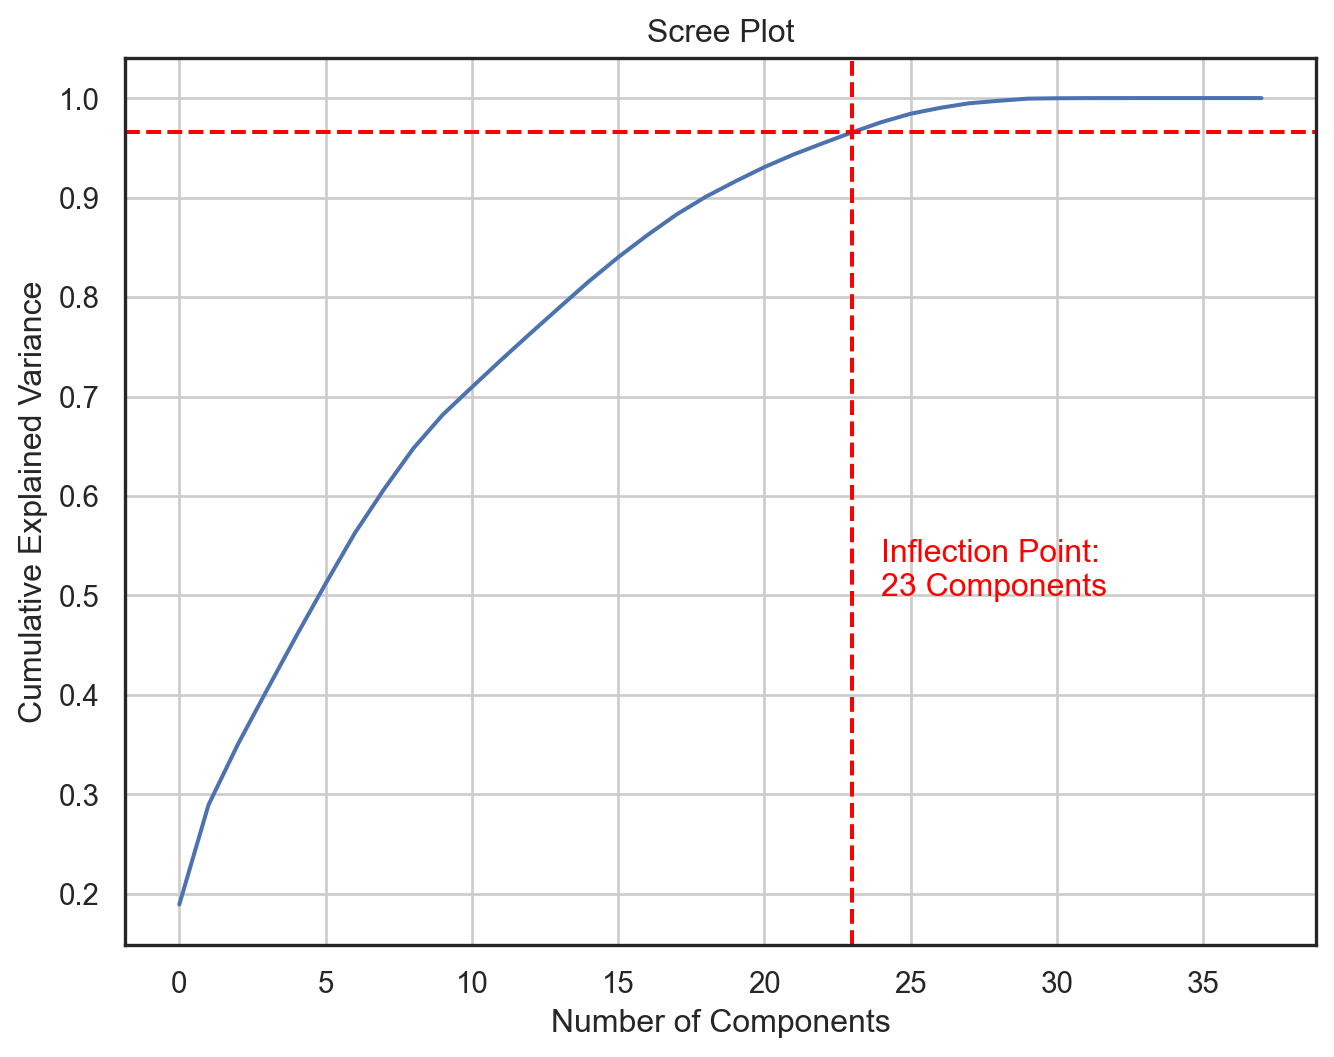

In [15]:
#| code-fold: true
pca_full = PCA()
pca_full.fit(scaled_data)
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize = (8, 6))
plt.plot(cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid(True)

inflection_point = np.argmax(cumulative_variance >= 0.95) + 1  
plt.axvline(x=inflection_point, color='red', linestyle='--')
plt.axhline(y=cumulative_variance[inflection_point], color='red', linestyle='--')
plt.text(inflection_point+1, 0.5, f'Inflection Point:\n{inflection_point} Components', color = 'red')

plt.show()

In [16]:
numerical_cols = loans.select_dtypes(include = ['int64', 'float64'])
corr_matrix = numerical_cols.corr()

threshold = 0.75  # This is an example threshold
highly_correlated_pairs = [(i, j) for i in corr_matrix.columns for j in corr_matrix.columns if (i != j) and (abs(corr_matrix[i][j]) > threshold)]

print("Highly correlated pairs:")
for pair in highly_correlated_pairs:
    print(pair)

Highly correlated pairs:
('total_credit_lines', 'open_credit_lines')
('total_credit_lines', 'num_satisfactory_accounts')
('total_credit_lines', 'num_total_cc_accounts')
('open_credit_lines', 'total_credit_lines')
('open_credit_lines', 'num_satisfactory_accounts')
('open_credit_lines', 'num_open_cc_accounts')
('num_historical_failed_to_pay', 'tax_liens')
('current_accounts_delinq', 'num_accounts_30d_past_due')
('num_satisfactory_accounts', 'total_credit_lines')
('num_satisfactory_accounts', 'open_credit_lines')
('num_satisfactory_accounts', 'num_open_cc_accounts')
('num_accounts_30d_past_due', 'current_accounts_delinq')
('num_active_debit_accounts', 'num_cc_carrying_balance')
('num_total_cc_accounts', 'total_credit_lines')
('num_total_cc_accounts', 'num_open_cc_accounts')
('num_open_cc_accounts', 'open_credit_lines')
('num_open_cc_accounts', 'num_satisfactory_accounts')
('num_open_cc_accounts', 'num_total_cc_accounts')
('num_open_cc_accounts', 'num_cc_carrying_balance')
('num_cc_carryin

In [17]:
columns_to_remove = [
    'total_credit_lines',  # Redundant with open_credit_lines and other credit line features
    'num_satisfactory_accounts',  # Likely a subset of other credit line features
    'tax_liens',  # If num_historical_failed_to_pay is more relevant
    'current_accounts_delinq',  # Redundant with num_accounts_30d_past_due
    'num_total_cc_accounts',  # Redundant with num_open_cc_accounts
    'installment',  # If loan_amount is more fundamental to the analysis
    'balance',  # If loan_amount provides a better perspective
    'grade',  # Sub_grade provides more detailed information
    'paid_total',  # If paid_principal provides a better perspective
]

loans.drop(columns = columns_to_remove)

loans.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,installment,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees,risk
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,0,2001,6,28,10,70795,38767,0,0,0,1250,2,5,5.0,10,0.0,0,2,11100,14,8,6,1,92.9,0,0,moving,individual,28000,60,14.07,652.53,C,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0,Medium Risk
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,0,1996,1,30,14,28800,4321,0,1,0,0,0,11,8.0,14,0.0,0,3,16500,24,14,4,0,100.0,0,1,debt_consolidation,individual,5000,36,12.61,167.54,C,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0,Medium Risk
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,0,2006,4,31,10,24193,16000,0,0,0,432,1,13,7.0,10,0.0,0,3,4300,14,8,6,0,93.5,0,0,other,individual,2000,36,17.09,71.40,D,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0,Medium Risk
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,0,2007,0,4,4,25400,4997,0,1,0,0,1,1,15.0,4,0.0,0,2,19400,3,3,2,0,100.0,1,0,debt_consolidation,individual,21600,36,6.72,664.19,A,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0,Low Risk
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,0,2008,7,22,16,69839,52722,0,0,0,0,1,6,4.0,16,0.0,0,10,32700,20,15,13,0,100.0,0,0,credit_card,joint,23000,36,14.07,786.87,C,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0,Medium Risk


In [18]:
#| code-line-numbers: 1-19|2|5-7|10,11|14|17-19

# Encode categorical variables
categorical_columns = loans.select_dtypes(include = ['object', 'category']).columns.tolist()

# Encode categorical variables
label_encoders = {col: LabelEncoder() for col in categorical_columns}
for col in categorical_columns:
    loans[col] = label_encoders[col].fit_transform(loans[col])
    
# Define features and target
X = loans.drop('risk', axis = 1)
y = loans['risk']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Reduce dimensionality to prevent overfitting
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [19]:
def decisionplot(model, X, y, resolution=216):
    # Split the data into features (X) and the class variable (y)
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, resolution),
                         np.linspace(y_min, y_max, resolution))

    # Predict outcomes for each point on the grid
    if isinstance(model, LinearDiscriminantAnalysis):
        # For LDA, we need to use the decision_function method
        Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    
    if isinstance(model, LinearDiscriminantAnalysis):
    # Reshape LDA decision function output appropriately
        Z = Z.reshape(-1, 1)
    else:
        Z = Z.reshape(xx.shape)

    # Plot the actual data points
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors='k', s=20)

    # Overlay the decision boundary
    plt.contourf(xx, yy, Z, alpha = 0.5)
    
    # Calculate the accuracy
    predictions = model.predict(X)
    acc = accuracy_score(y, predictions)
    
  
    # Set labels for axes
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])

    plt.show()

In [20]:
#| code-line-numbers: 1-4|1|2|3|4
log_reg = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', max_iter = 1000, random_state = 42)
log_reg.fit(X_train_pca, y_train)
predictions = log_reg.predict(X_test_pca)
print("Logistic Regression Accuracy:", round(accuracy_score(y_test, predictions), 3))

Logistic Regression Accuracy: 0.549


/Users/johnchen/Documents/Solutions/course-website/env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


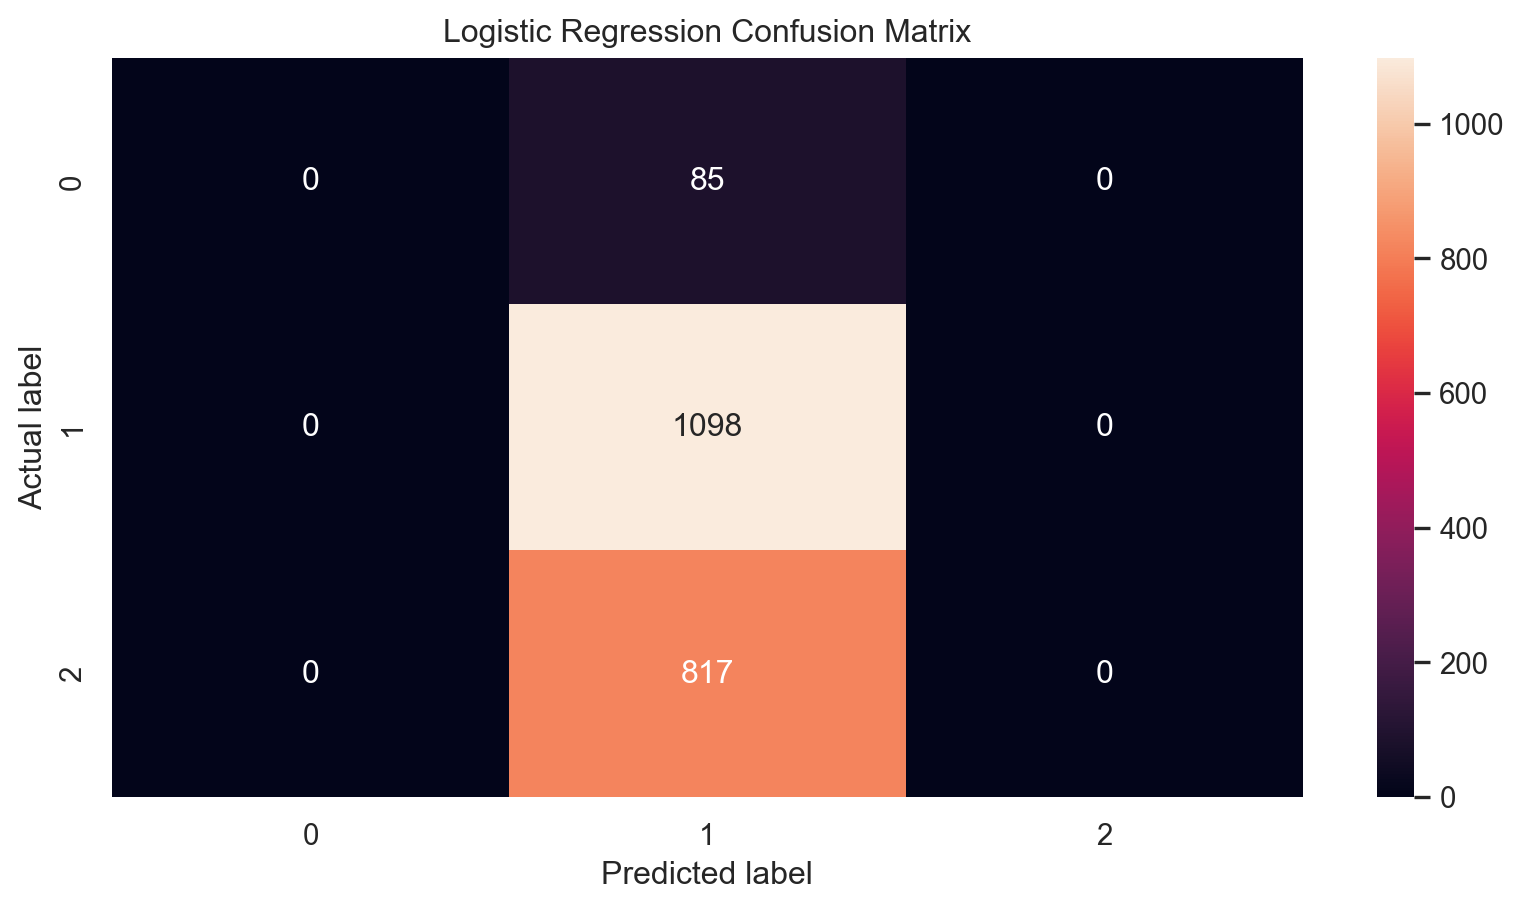

In [21]:
#| code-fold: true
#| code-line-numbers: 1-6|1|2-6
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot = True, fmt = 'g')
plt.title('Logistic Regression Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

/Users/johnchen/Documents/Solutions/course-website/env/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


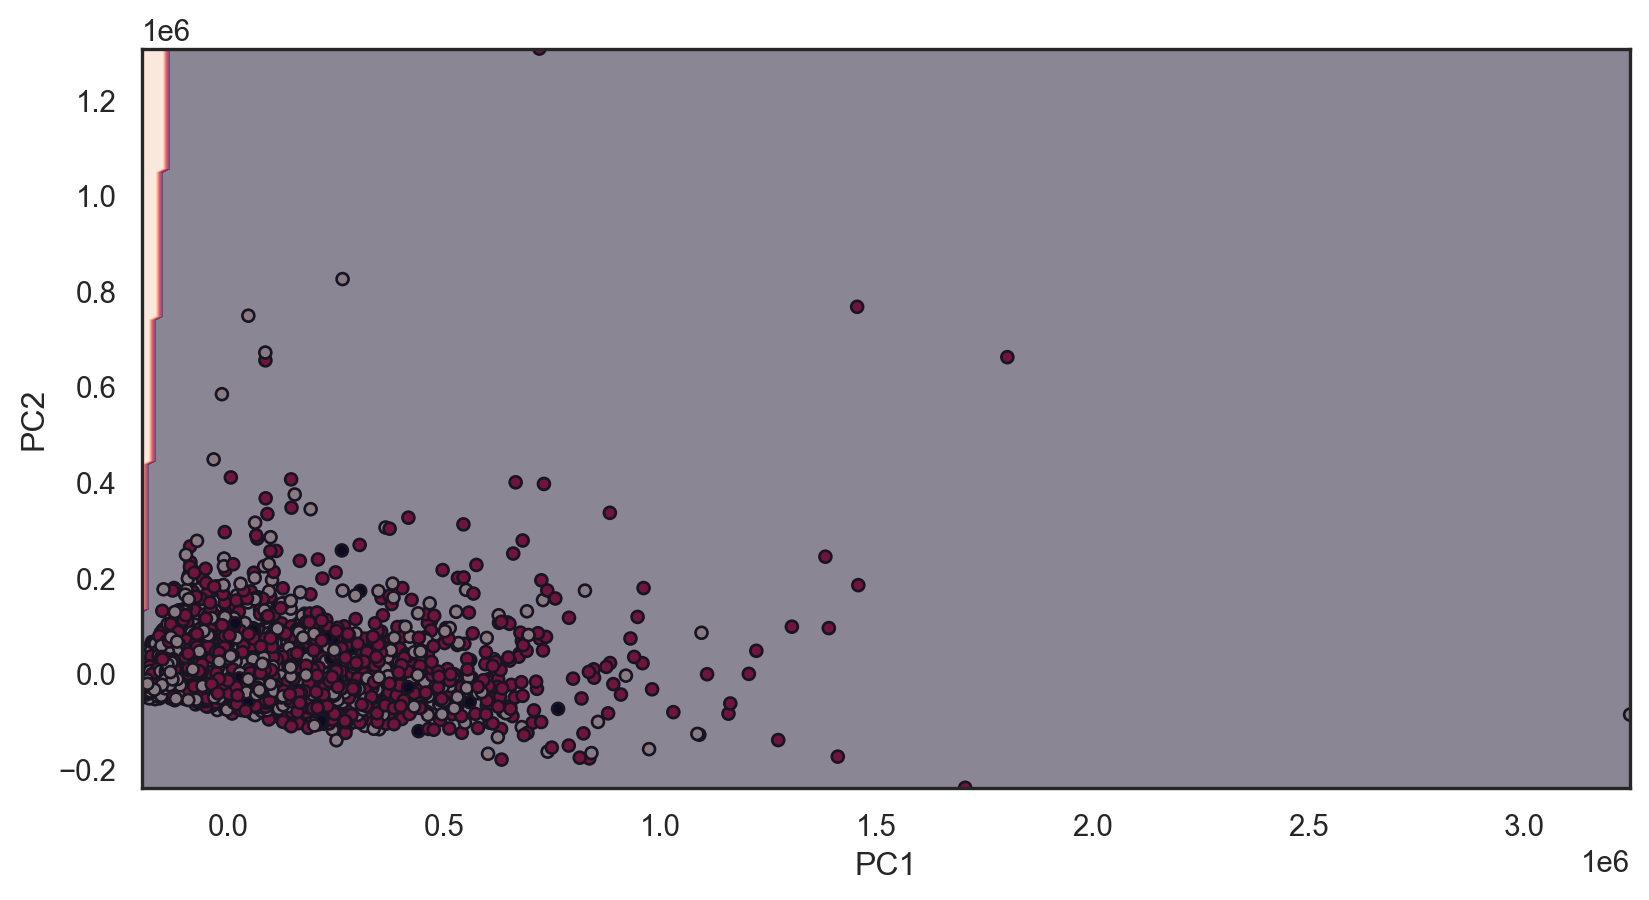

In [22]:
#| code-fold: true
decisionplot(log_reg, pd.DataFrame(X_train_pca, columns = ['PC1', 'PC2']), y_train)
plt.show()

In [23]:
#| code-line-numbers: 1-4|1
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_pca, y_train)
predictions = lda.predict(X_test_pca)
print("LDA Accuracy:", round(accuracy_score(y_test, predictions), 3))

LDA Accuracy: 0.549


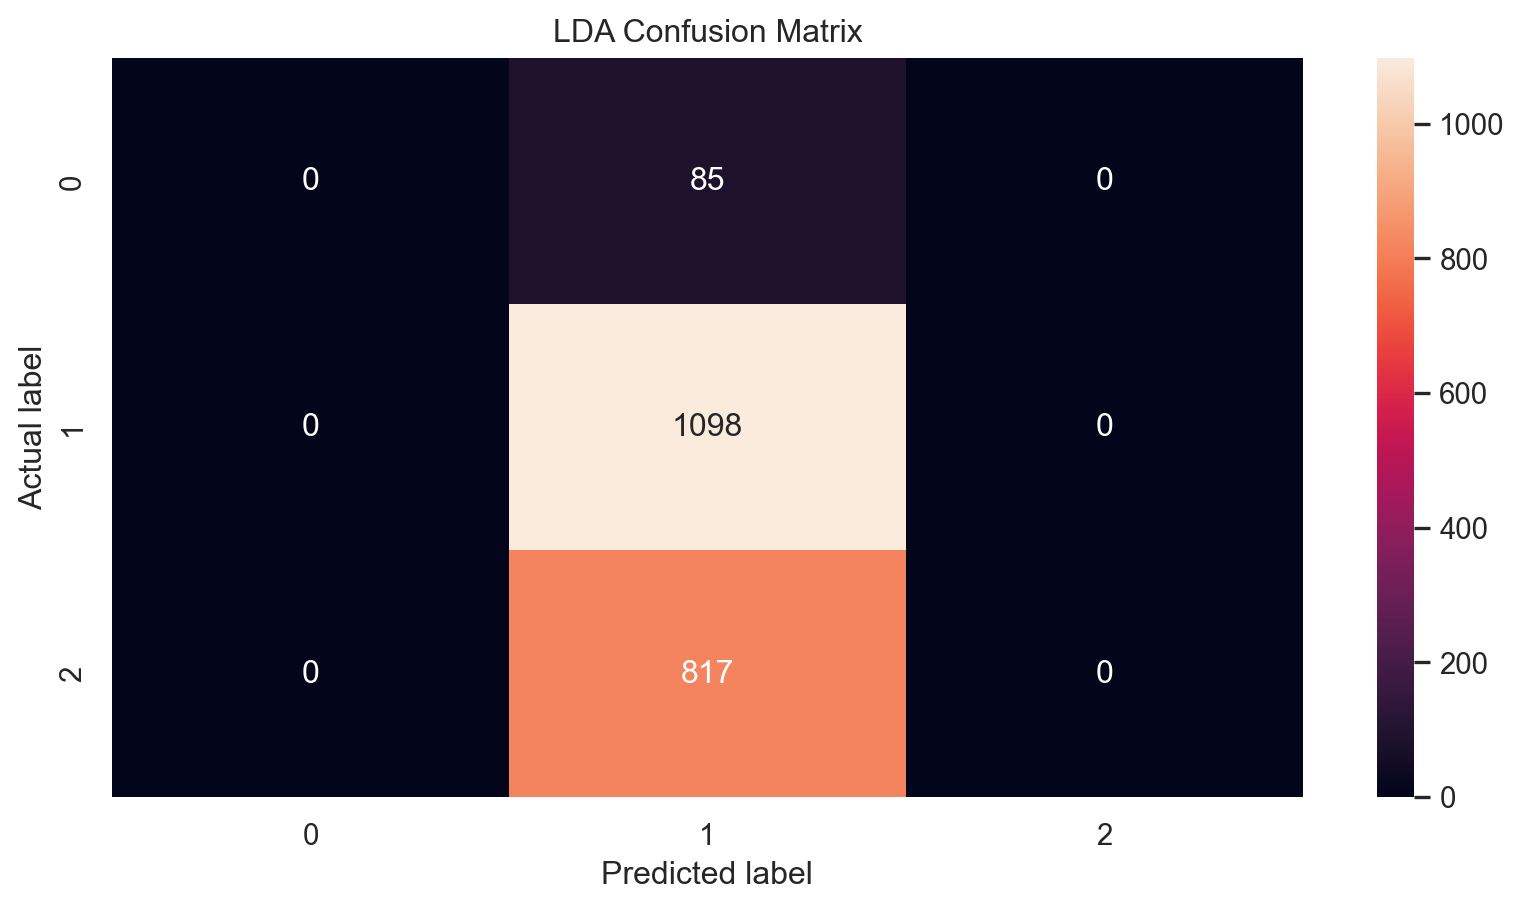

In [24]:
#| code-fold: true
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot = True, fmt = 'g')
plt.title('LDA Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

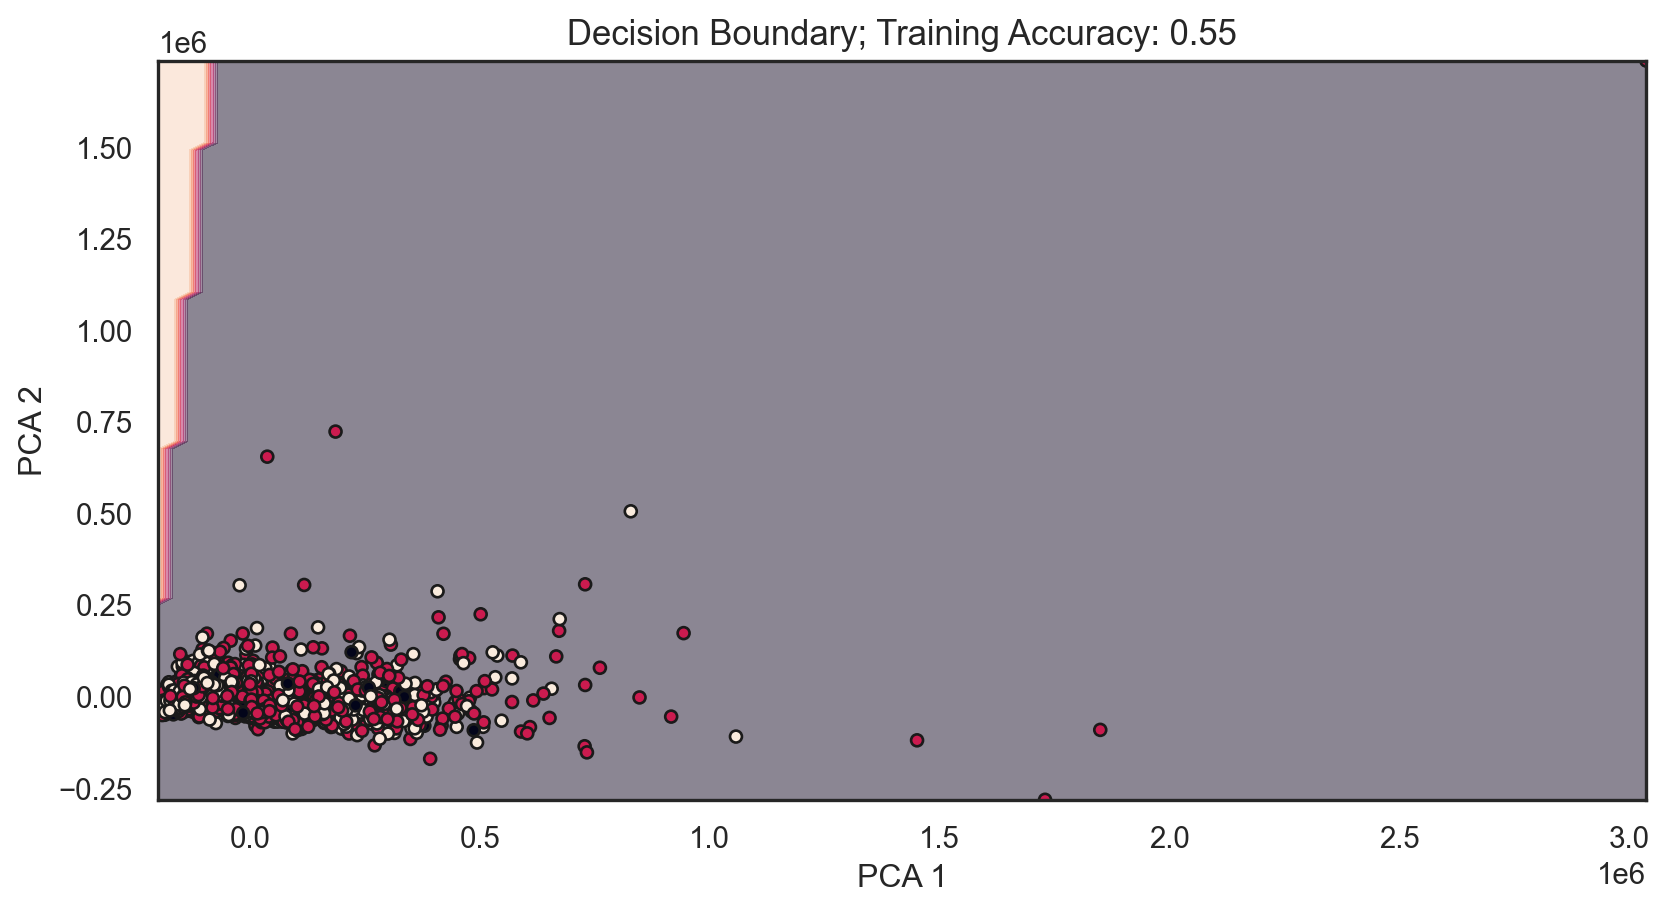

In [25]:
#| code-fold: true
acc = round(accuracy_score(y_test, predictions), 3)
# Create a meshgrid for plotting
x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict on grid points using test data
Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)  # Reshape to match grid shape

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha = 0.5)

# Overlay data points from the test set
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, edgecolors = 'k', s = 20)

# Customize plot
plt.title(f"Decision Boundary; Training Accuracy: {acc:.2f}", fontsize = 13)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

In [26]:
#| code-line-numbers: 1-4|1
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_pca, y_train)
predictions = knn.predict(X_test_pca)
print("KNN Accuracy:", round(accuracy_score(y_test, predictions), 3))

KNN Accuracy: 0.508


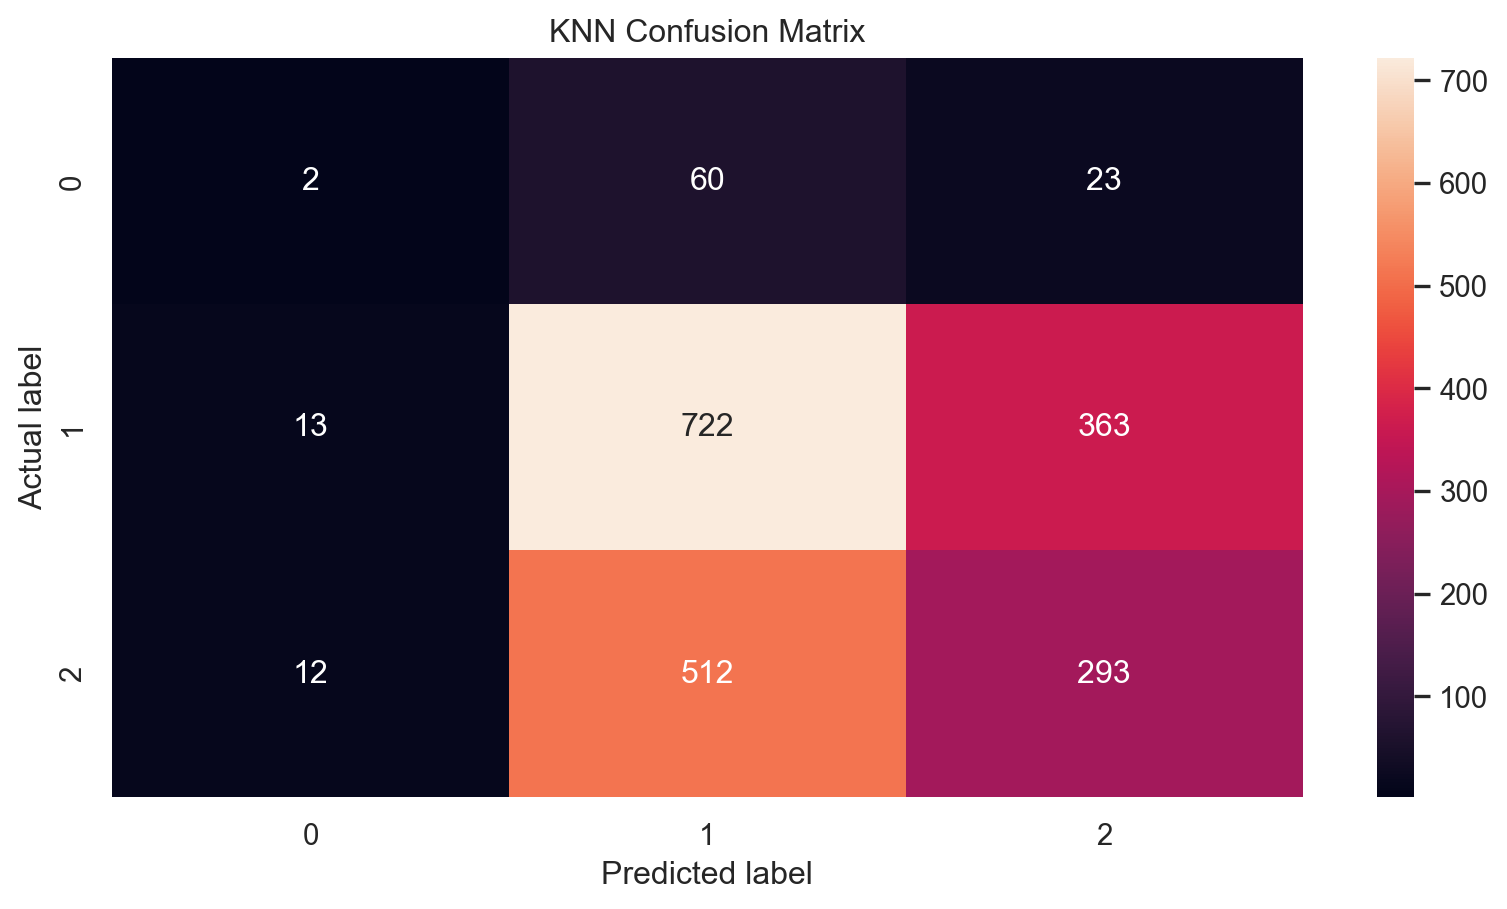

In [27]:
#| code-fold: true
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot = True, fmt ='g')
plt.title('KNN Confusion Matrix') 
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

/Users/johnchen/Documents/Solutions/course-website/env/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


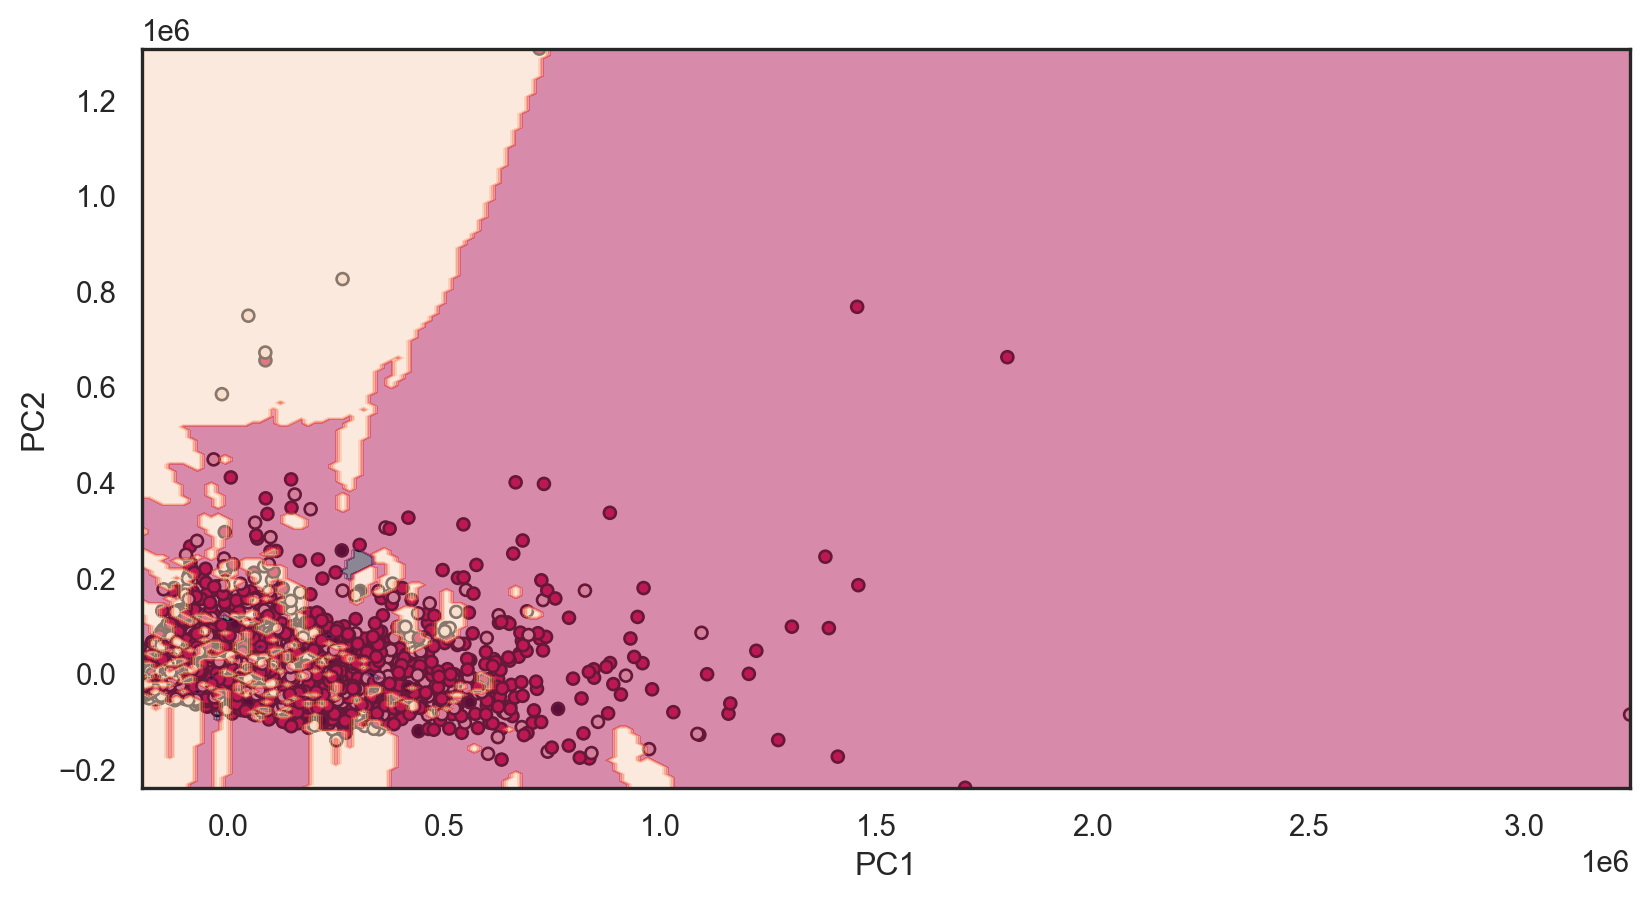

In [28]:
decisionplot(knn, pd.DataFrame(X_train_pca, columns = ['PC1', 'PC2']), y_train)
plt.show()

In [29]:
#| code-line-numbers: 1-4|1
gnb = GaussianNB()
gnb.fit(X_train_pca, y_train)
predictions = gnb.predict(X_test_pca)
print("Naive Bayes Accuracy:", round(accuracy_score(y_test, predictions), 3))

Naive Bayes Accuracy: 0.516


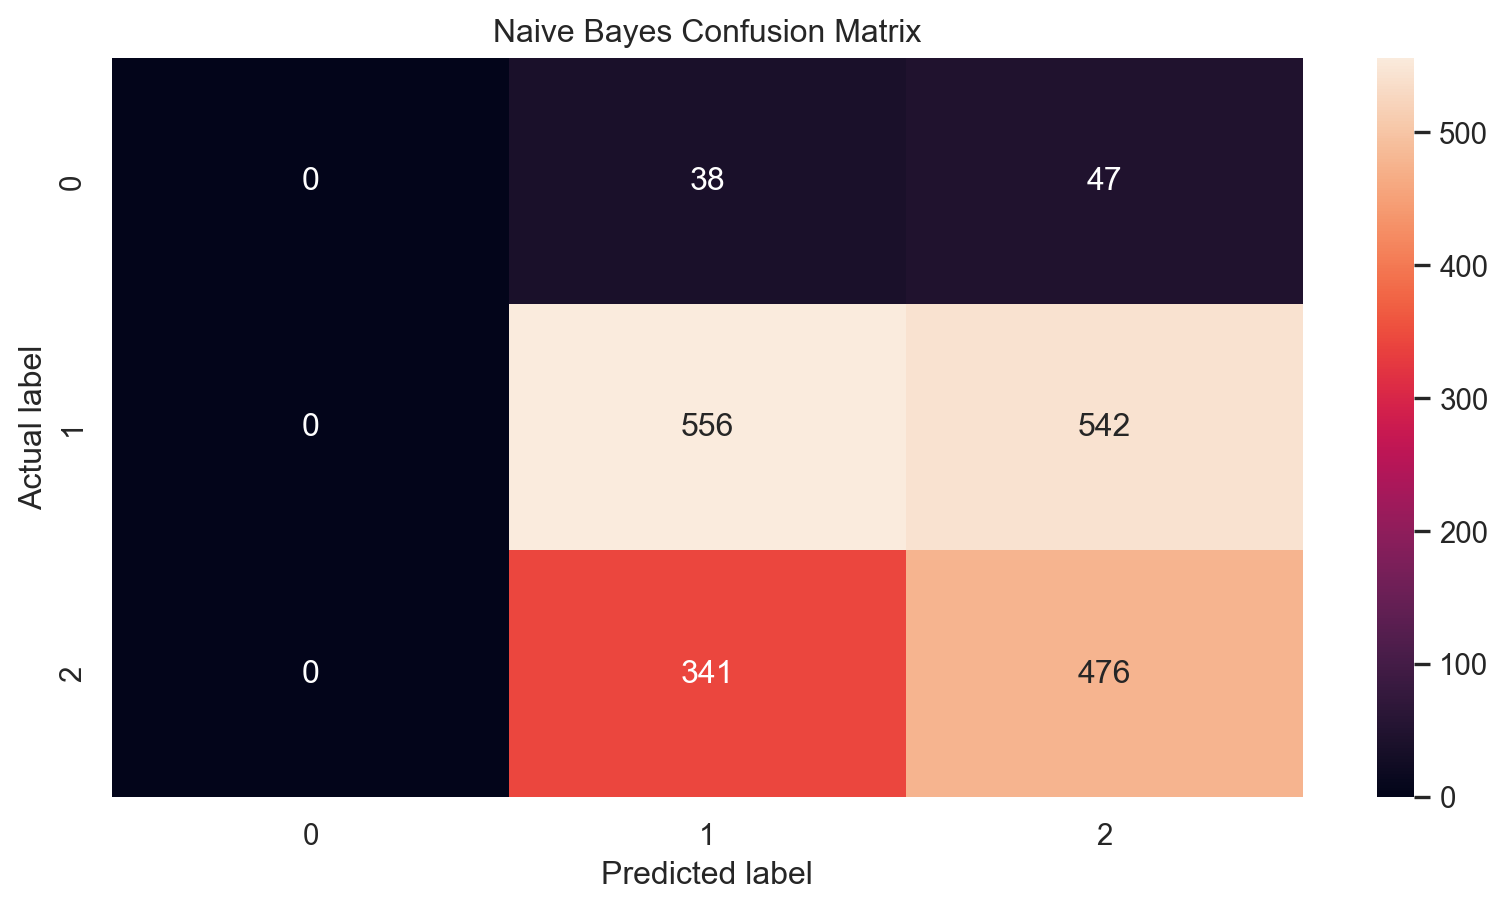

In [30]:
#| code-fold: true
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot = True, fmt ='g')
plt.title('Naive Bayes Confusion Matrix') 
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

/Users/johnchen/Documents/Solutions/course-website/env/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


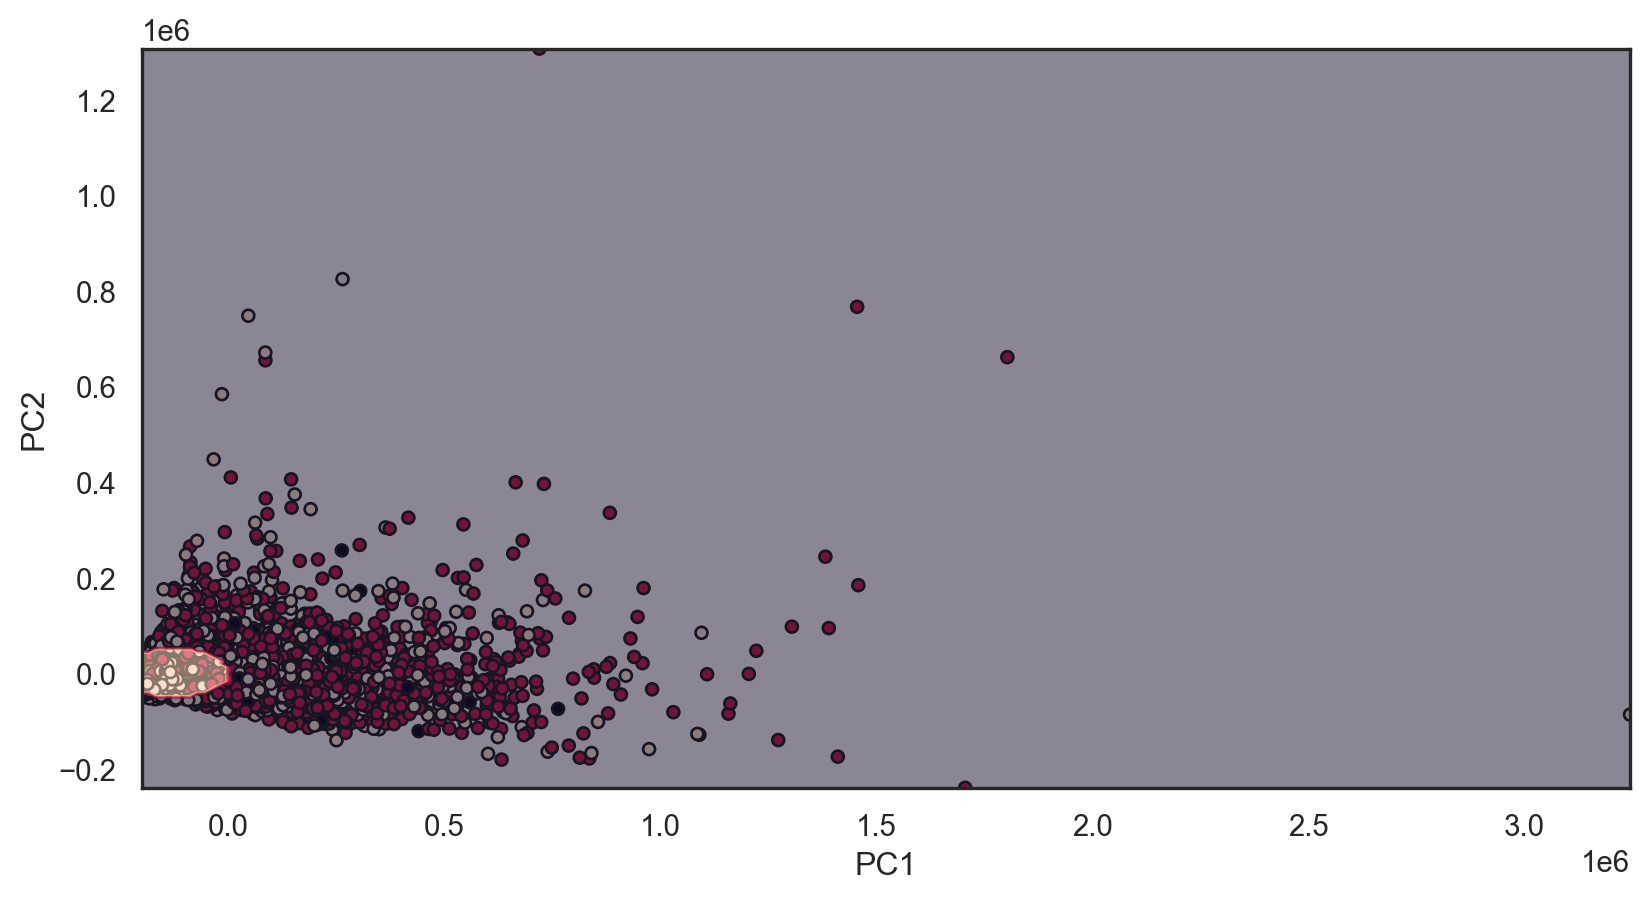

In [31]:
decisionplot(gnb, pd.DataFrame(X_train_pca, columns = ['PC1', 'PC2']), y_train)
plt.show()

In [32]:
#| code-line-numbers: 1-4|1
dtree = DecisionTreeClassifier()
dtree.fit(X_train_pca, y_train)
predictions = dtree.predict(X_test_pca)
print("Decision Tree Accuracy:", round(accuracy_score(y_test, predictions), 3))

Decision Tree Accuracy: 0.483


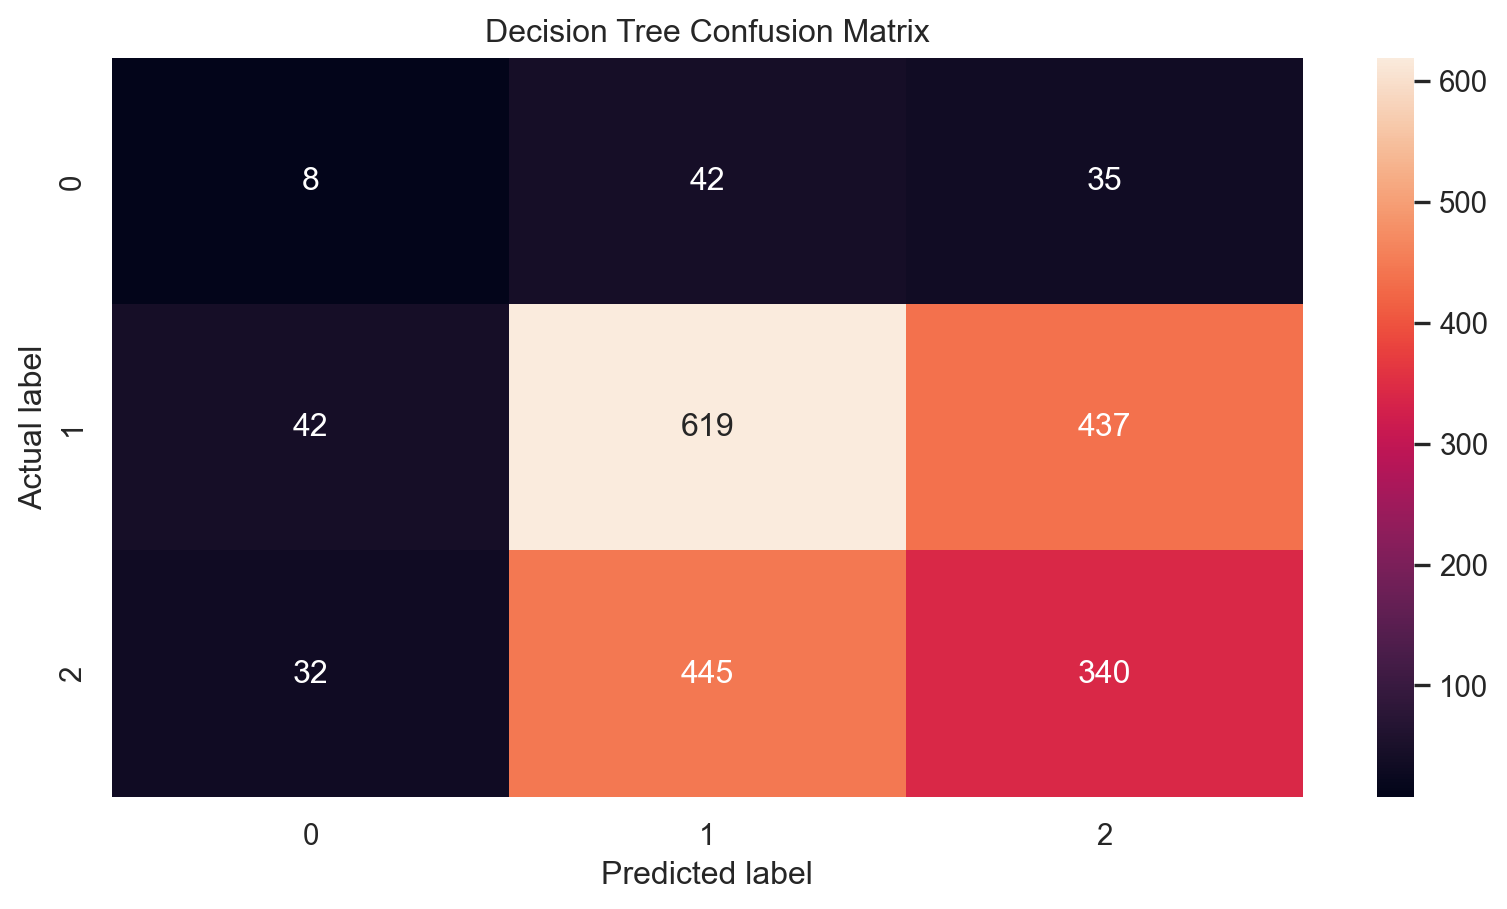

In [33]:
#| code-fold: true
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot = True, fmt = 'g')
plt.title('Decision Tree Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

/Users/johnchen/Documents/Solutions/course-website/env/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


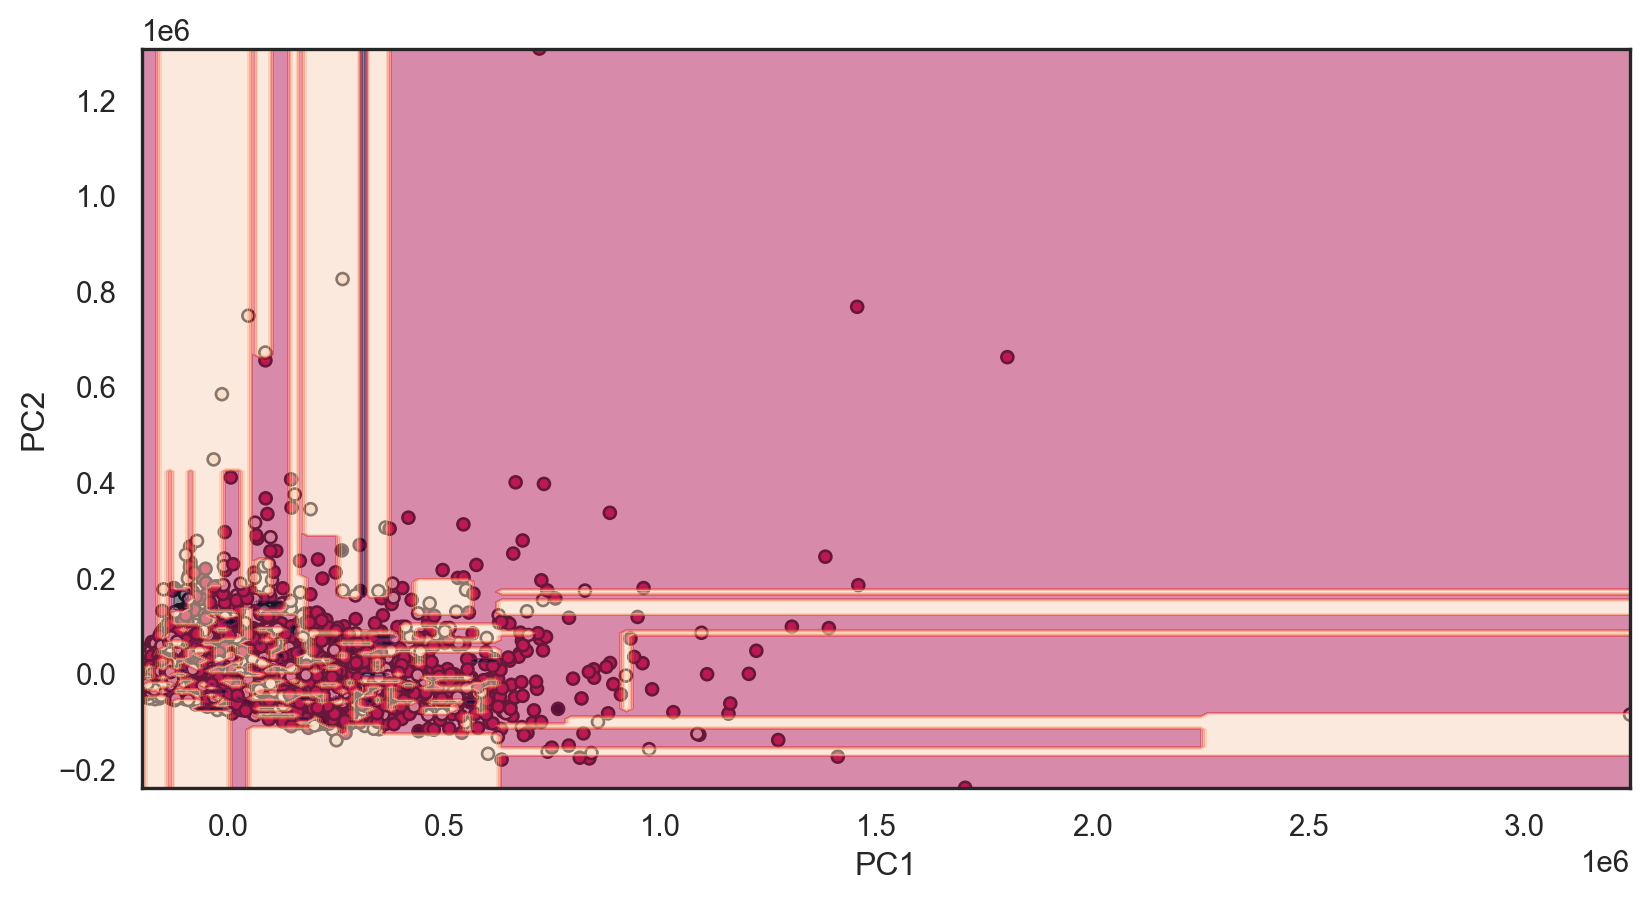

In [34]:
decisionplot(dtree, pd.DataFrame(X_train_pca, columns = ['PC1', 'PC2']), y_train)
plt.show()

In [35]:
#| code-line-numbers: 1-4|1
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_pca, y_train)
predictions = rf_classifier.predict(X_test_pca)
print("Random Forest Accuracy:", round(accuracy_score(y_test, predictions), 3))

Random Forest Accuracy: 0.491


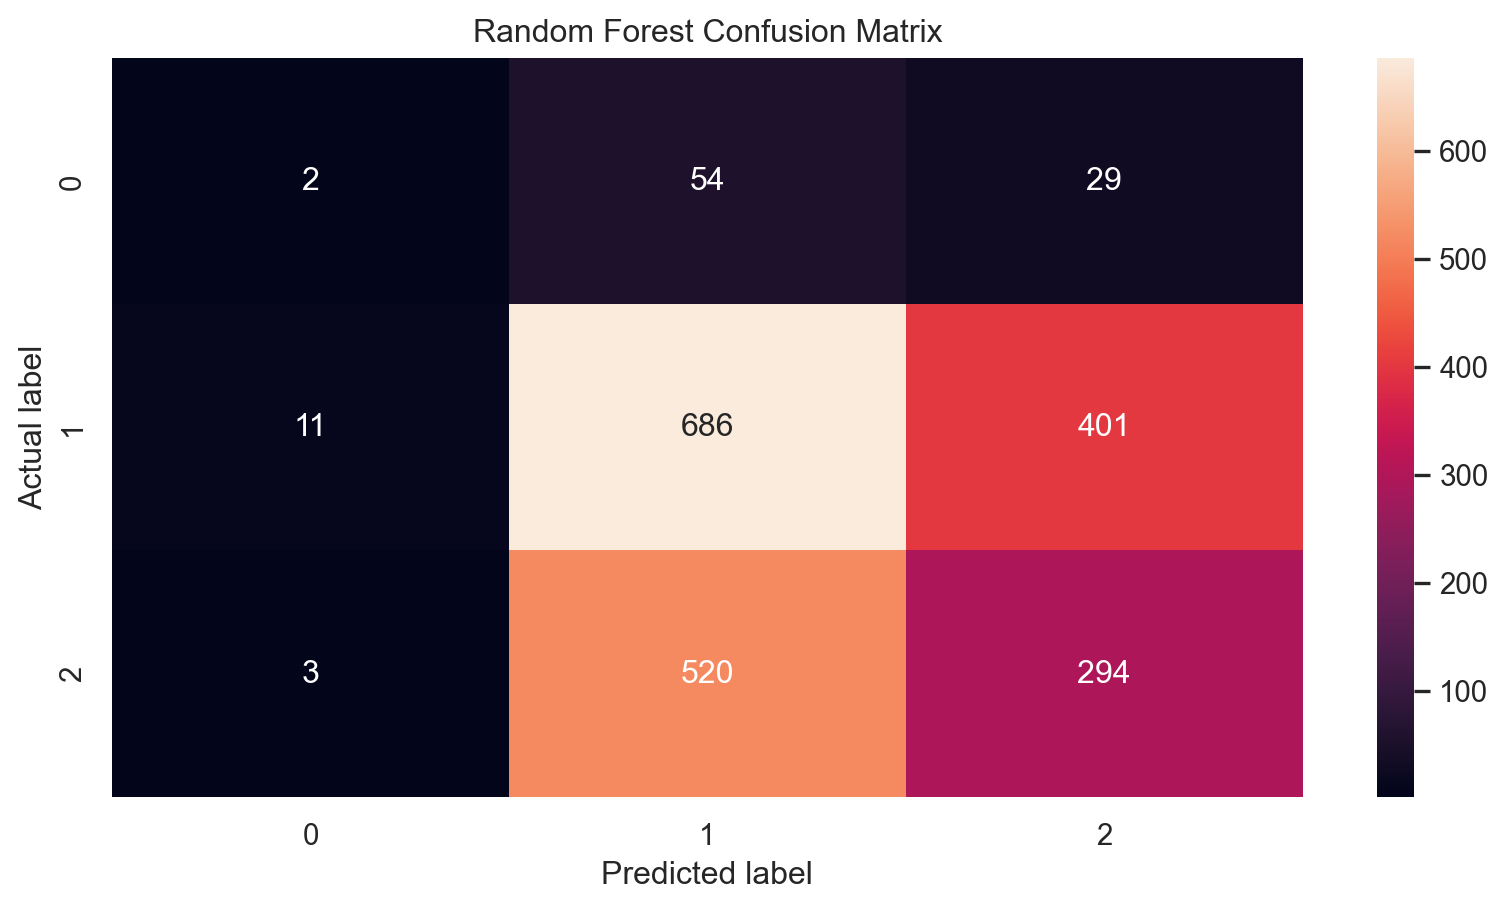

In [36]:
#| code-fold: true
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot = True, fmt = 'g')
plt.title('Random Forest Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

/Users/johnchen/Documents/Solutions/course-website/env/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


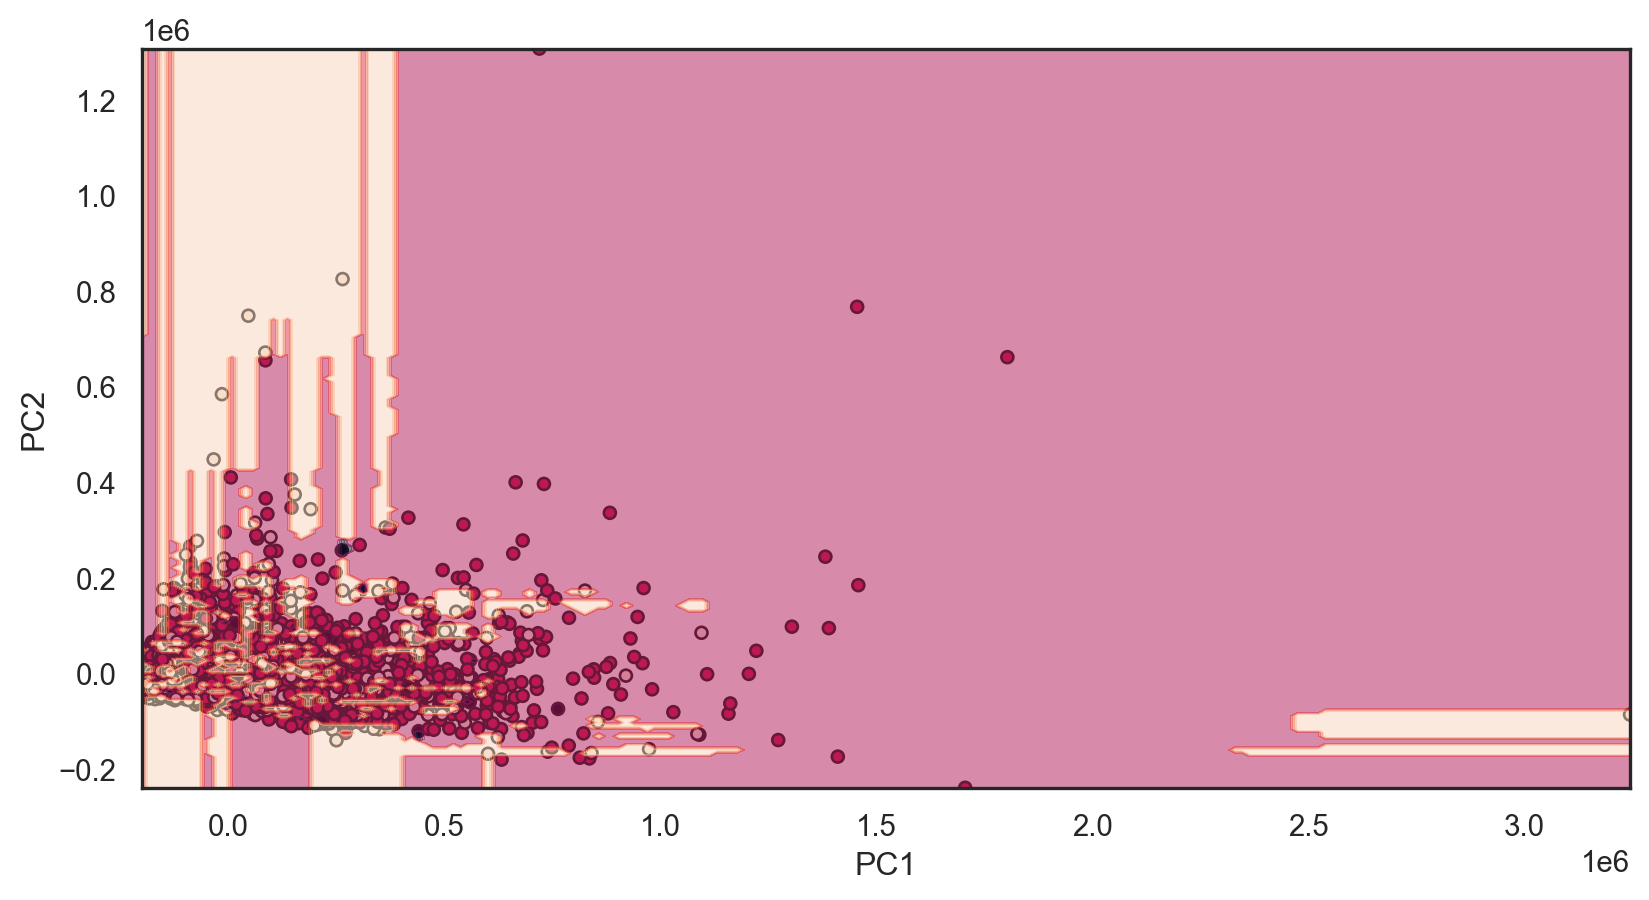

In [37]:
decisionplot(rf_classifier, pd.DataFrame(X_train_pca, columns = ['PC1', 'PC2']), y_train)
plt.show()

In [38]:
#| code-line-numbers: 1-4|1
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train_pca, y_train)
predictions = xgb_model.predict(X_test_pca)
print("XGBoost Accuracy:", round(accuracy_score(y_test, predictions), 3))

XGBoost Accuracy: 0.515


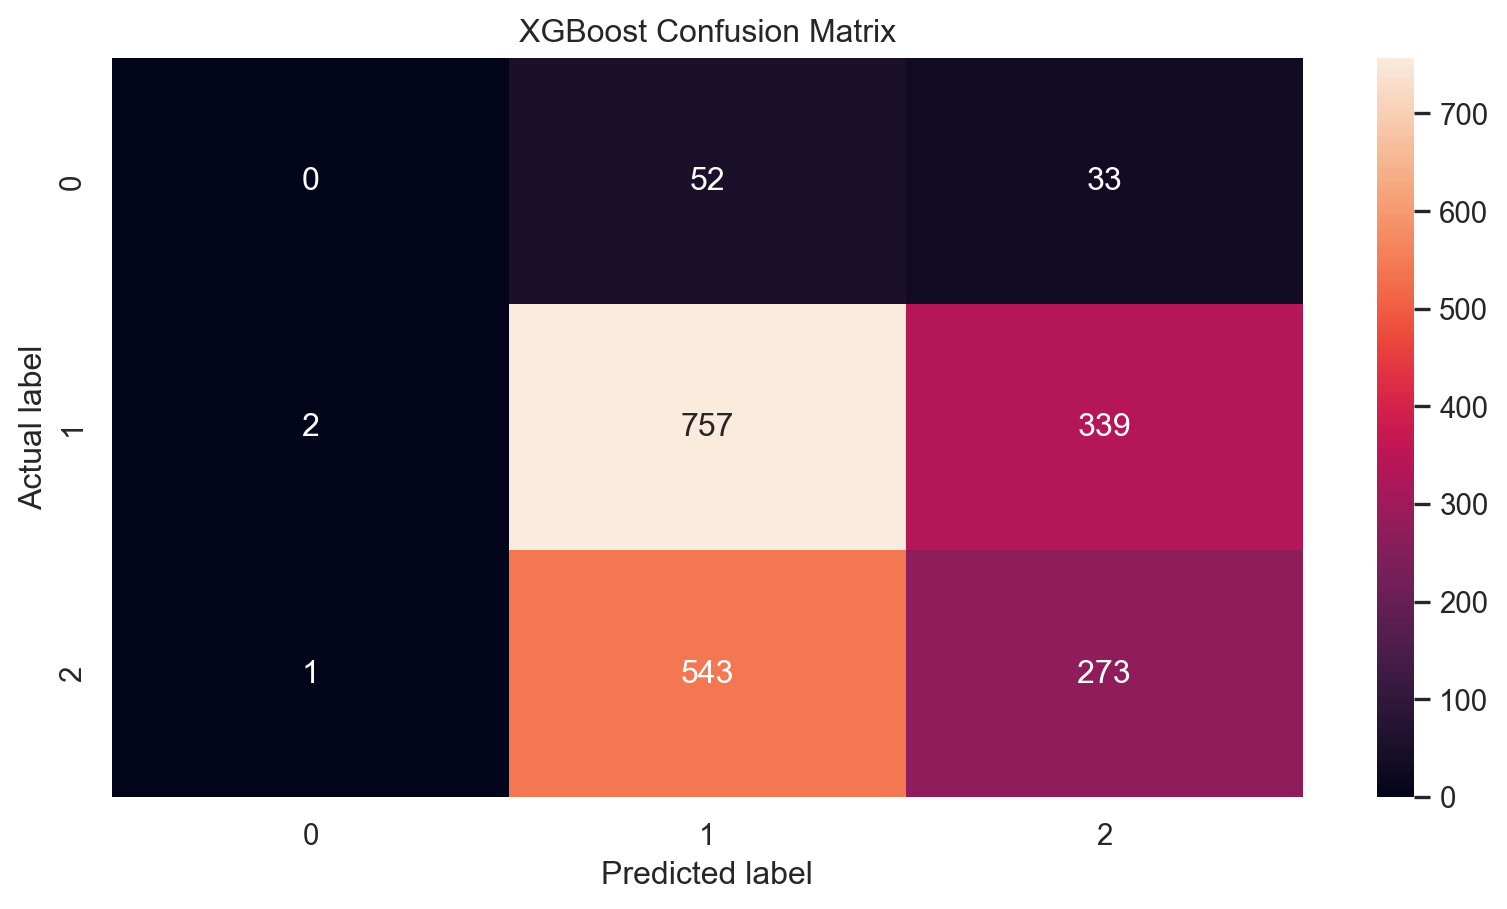

In [39]:
#| code-fold: true
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot = True, fmt = 'g')
plt.title('XGBoost Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

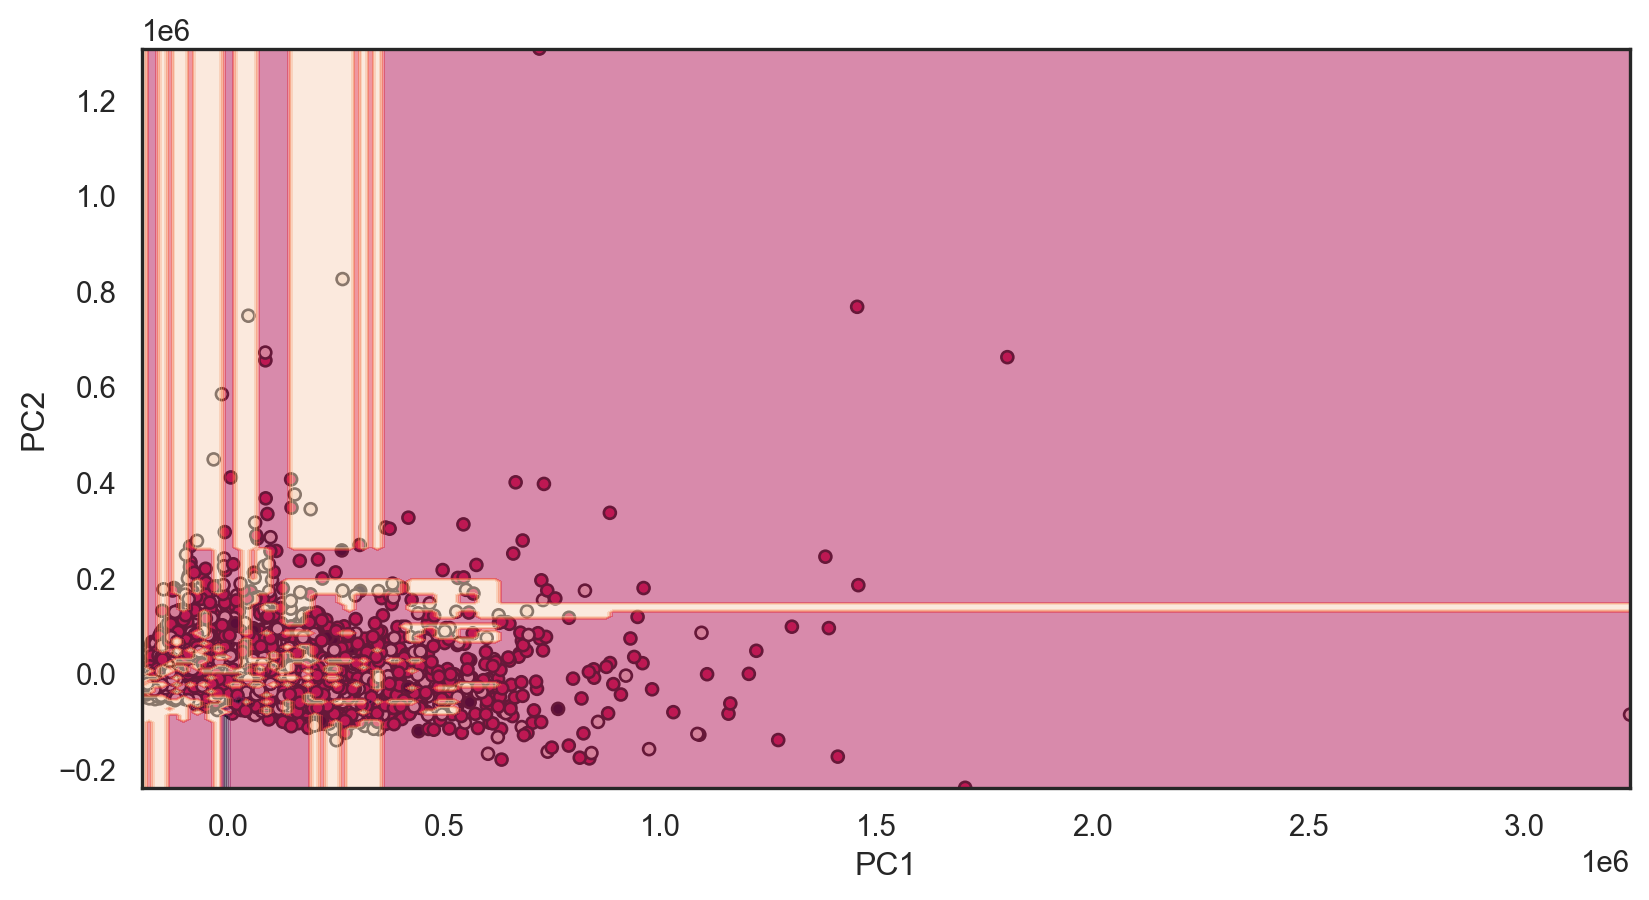

In [40]:
decisionplot(xgb_model, pd.DataFrame(X_train_pca, columns = ['PC1', 'PC2']), y_train)
plt.show()

In [41]:
#| code-line-numbers: 1-10|1-5
model = Sequential()
model.add(Dense(10, input_dim = X_train_pca.shape[1], activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X_train_pca, y_train, epochs = 100, batch_size = 10, verbose=0)

nn_predictions = model.predict(X_test_pca)
nn_predictions = np.round(nn_predictions).flatten()
print("Neural Network Accuracy:", round(accuracy_score(y_test, nn_predictions), 3))

/Users/johnchen/Documents/Solutions/course-website/env/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 1/63 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step


Neural Network Accuracy: 0.549


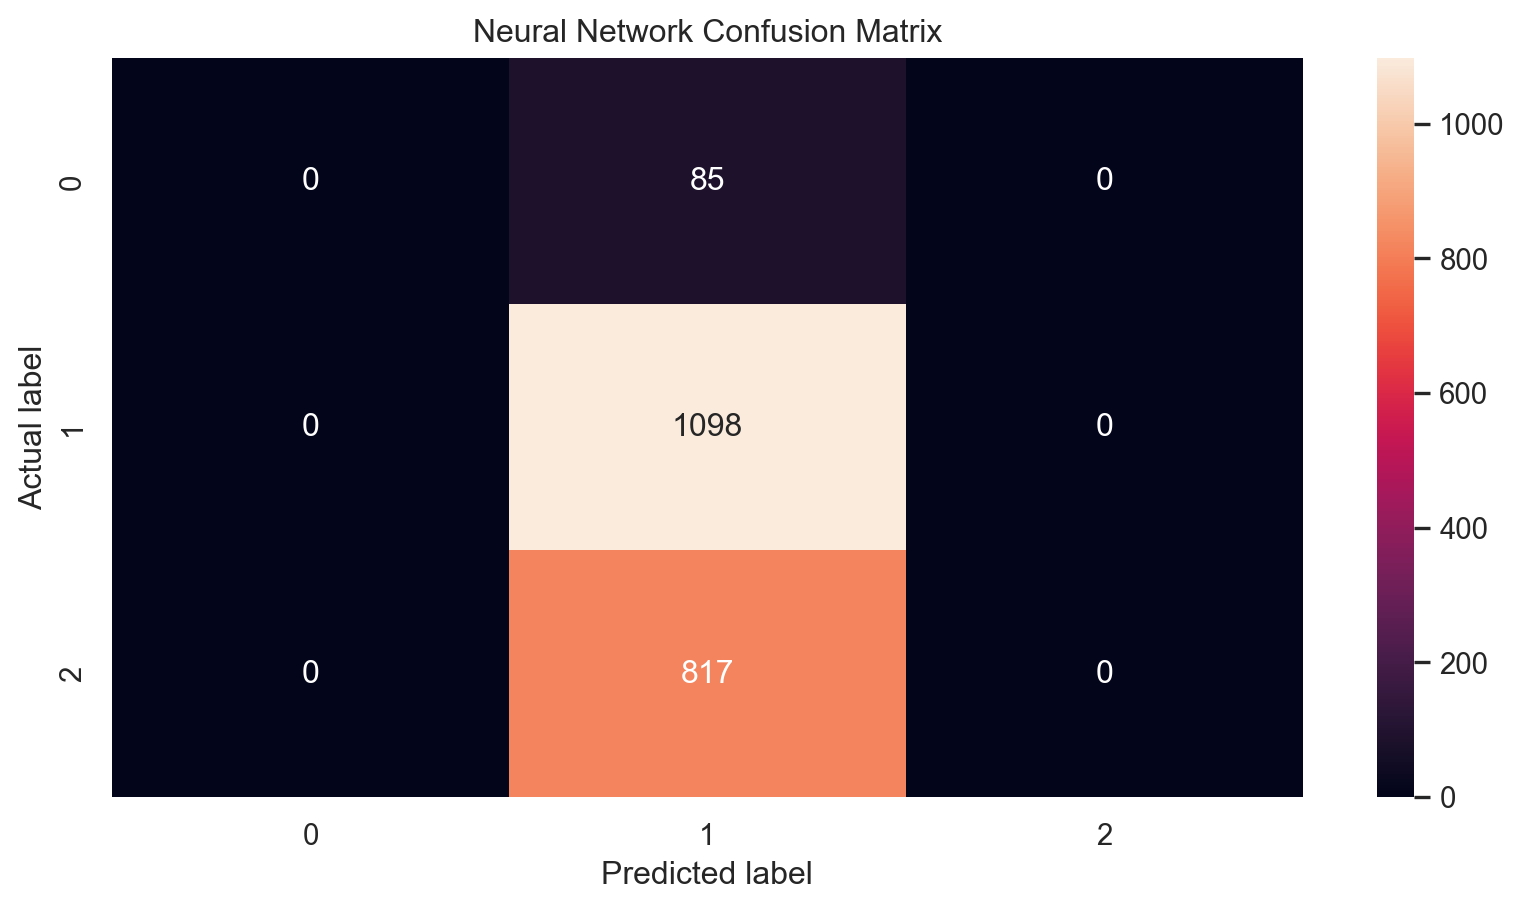

In [42]:
#| code-fold: true
cm = confusion_matrix(y_test, nn_predictions)
sns.heatmap(cm, annot = True, fmt = 'g')
plt.title('Neural Network Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [43]:
#| eval: false
decisionplot(model, pd.DataFrame(X_train_pca, columns = ['PC1', 'PC2']), y_train)
plt.show()

In [44]:
#| code-line-numbers: 1-11|7,8
loans['risk'] = loans['grade']

low_risk = ['A', 'B']
med_risk = ['C', 'D']
high_risk = ['E', 'F', 'G']

loans['risk'] = loans['grade'].apply(lambda x: 'Low Risk' if x in low_risk else ('Medium Risk' if x in med_risk else 'High Risk'))

risk_mapping = {'Low Risk': 1, 'Medium Risk': 2, 'High Risk': 3}
loans['risk'] = loans['risk'].map(risk_mapping)

loans.drop(columns = 'grade')

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,installment,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees,risk
0,1777,3.0,30,0,90000.0,2,18.01,0,2001,6,28,10,70795,38767,0,0,0,1250,2,5,5.0,10,0.0,0,2,11100,14,8,6,1,92.9,0,0,7,0,28000,60,14.07,652.53,12,2,1,1,0,27015.86,1999.33,984.14,1015.19,0.0,3
1,4676,10.0,11,2,40000.0,0,5.04,0,1996,1,30,14,28800,4321,0,1,0,0,0,11,8.0,14,0.0,0,3,16500,24,14,4,0,100.0,0,1,2,0,5000,36,12.61,167.54,10,0,1,1,0,4651.37,499.12,348.63,150.49,0.0,3
2,207,3.0,47,2,40000.0,1,21.15,0,2006,4,31,10,24193,16000,0,0,0,432,1,13,7.0,10,0.0,0,3,4300,14,8,6,0,93.5,0,0,8,0,2000,36,17.09,71.40,15,0,1,0,0,1824.63,281.80,175.37,106.43,0.0,3
3,1035,1.0,37,2,30000.0,0,10.16,0,2007,0,4,4,25400,4997,0,1,0,0,1,1,15.0,4,0.0,0,2,19400,3,3,2,0,100.0,1,0,2,0,21600,36,6.72,664.19,2,1,1,1,0,18853.26,3312.89,2746.74,566.15,0.0,3
4,3710,10.0,4,2,35000.0,2,57.96,0,2008,7,22,16,69839,52722,0,0,0,0,1,6,4.0,16,0.0,0,10,32700,20,15,13,0,100.0,0,0,1,1,23000,36,14.07,786.87,12,2,1,1,0,21430.15,2324.65,1569.85,754.80,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2830,10.0,42,2,108000.0,1,22.28,0,2008,5,44,13,199195,77963,0,1,0,0,3,8,6.0,13,0.0,0,4,44600,22,9,4,1,100.0,0,1,8,0,24000,36,7.35,744.90,3,1,1,1,0,21586.34,2969.80,2413.66,556.14,0.0,3
9996,1194,8.0,37,0,121000.0,2,32.38,4,1994,1,28,15,382061,101571,0,0,0,0,3,0,1.0,15,0.0,0,5,28200,18,11,8,2,82.1,0,0,2,0,10000,36,19.03,366.72,17,0,1,1,0,9147.44,1456.31,852.56,603.75,0.0,3
9997,4484,10.0,6,0,67000.0,2,45.26,2,2004,0,18,11,346402,95421,0,0,0,0,3,4,16.0,11,0.0,0,5,14900,9,7,5,2,72.2,0,0,2,1,30000,36,23.88,1175.10,21,0,1,0,0,27617.65,4620.80,2382.35,2238.45,0.0,3
9998,2410,1.0,47,0,80000.0,1,11.99,0,1999,1,38,15,294475,27641,0,0,0,0,2,2,5.0,15,0.0,0,1,46000,15,9,2,6,100.0,0,0,8,0,24000,36,5.32,722.76,0,0,1,1,0,21518.12,2873.31,2481.88,391.43,0.0,3


In [45]:
#| code-line-numbers: 1-5|1,2
ord_log_reg = m.LogisticAT(alpha = 1)  
ord_log_reg.fit(X_train_pca, y_train)

ordinal_predictions = ord_log_reg.predict(X_test_pca)
print("Ordinal Logistic Regression Accuracy:", round(accuracy_score(y_test, ordinal_predictions), 3))

Ordinal Logistic Regression Accuracy: 0.549


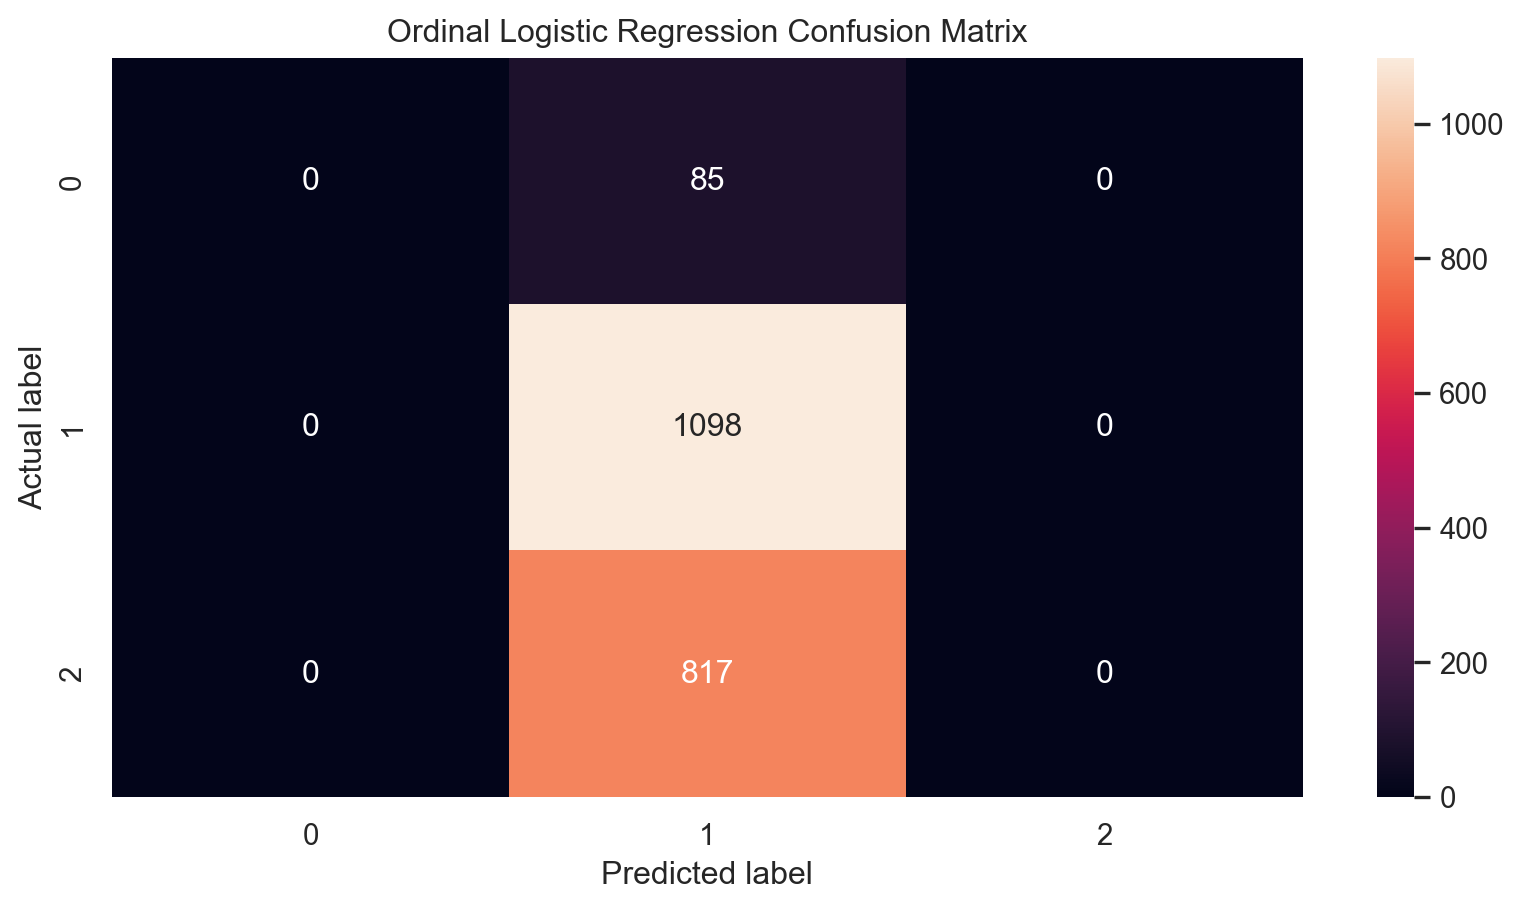

In [46]:
#| code-fold: true
cm = confusion_matrix(y_test, ordinal_predictions)
sns.heatmap(cm, annot=True, fmt='g')
plt.title('Ordinal Logistic Regression Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

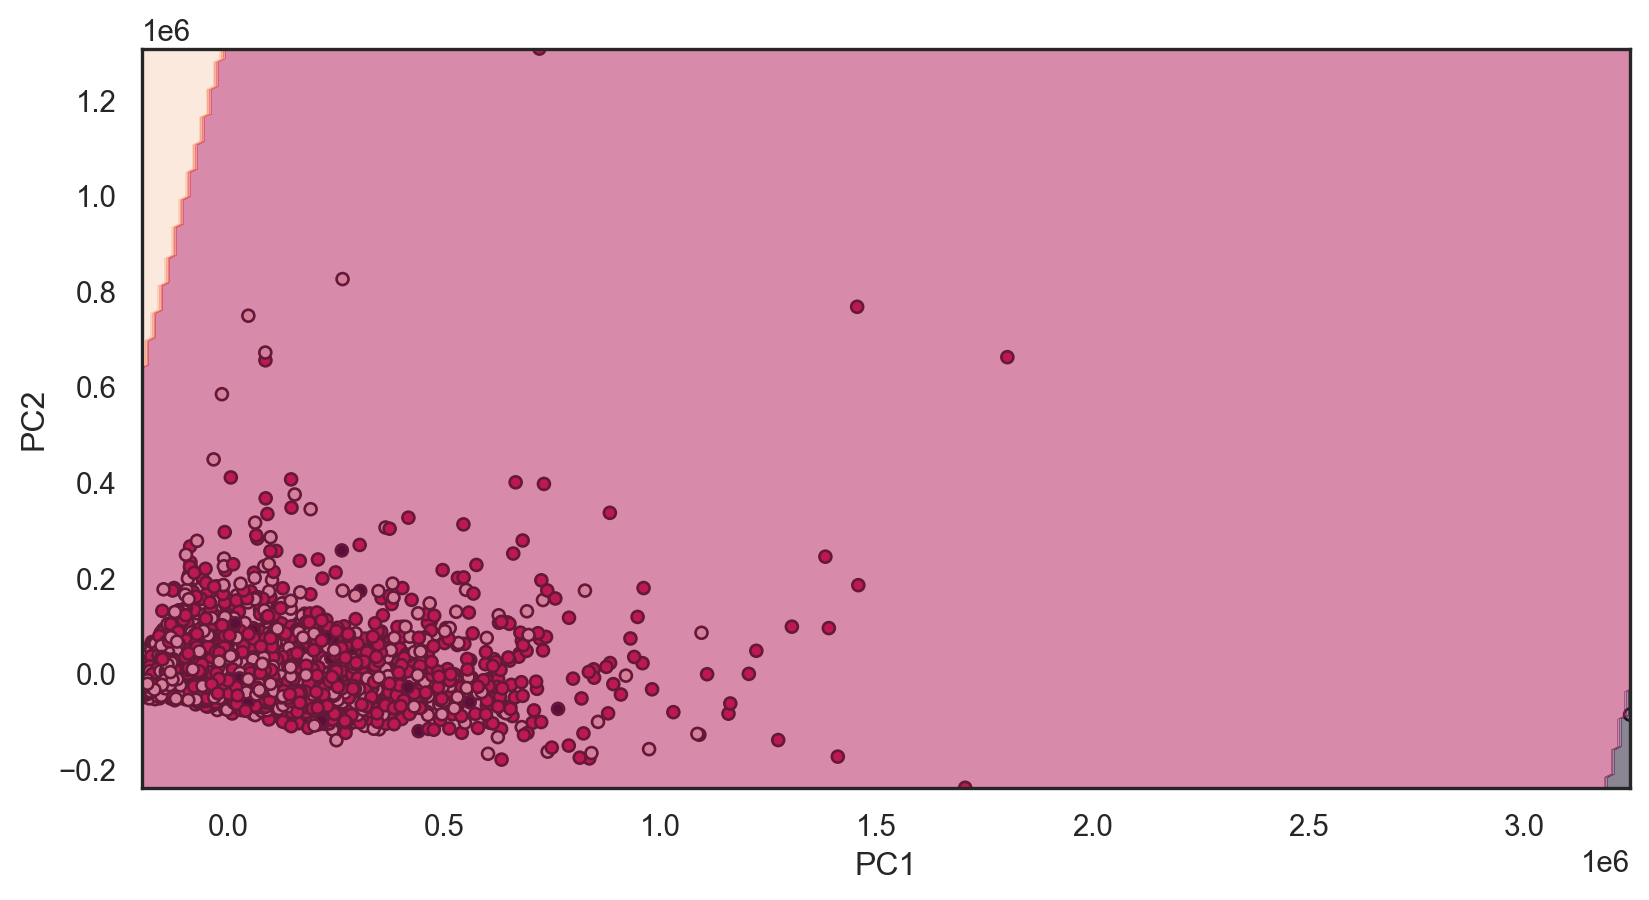

In [47]:
#| code-fold: true
decisionplot(ord_log_reg, pd.DataFrame(X_train_pca, columns = ['PC1', 'PC2']), y_train)
plt.show()

In [48]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_pca, y_train)
predictions = knn.predict(X_test_pca)
print("KNN Accuracy:", round(accuracy_score(y_test, predictions), 3))

KNN Accuracy: 0.508


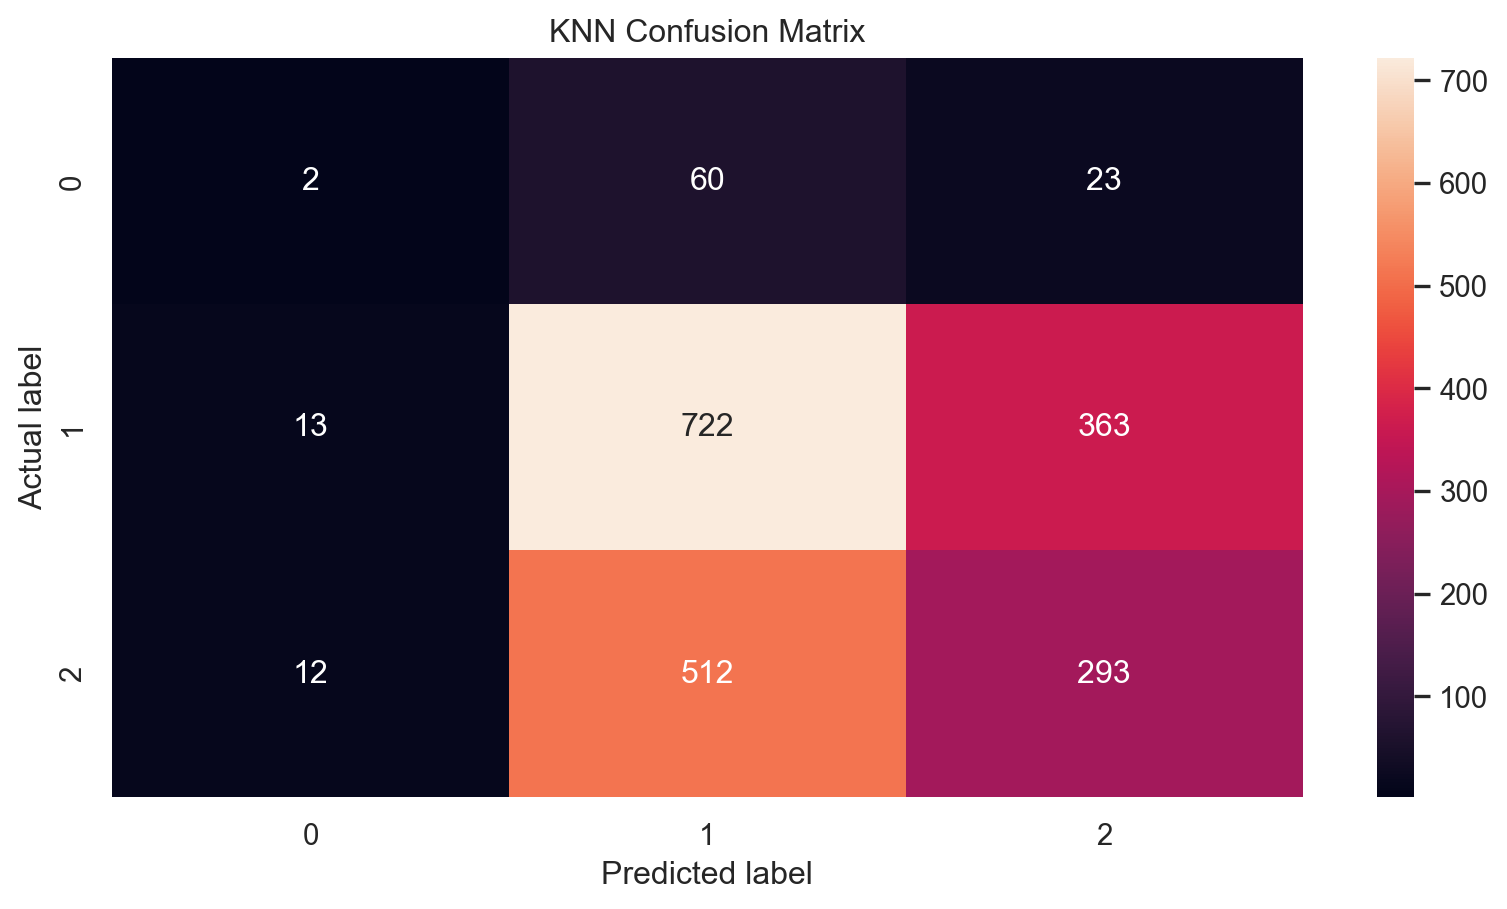

In [49]:
#| code-fold: true
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot = True, fmt ='g')
plt.title('KNN Confusion Matrix') 
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

/Users/johnchen/Documents/Solutions/course-website/env/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


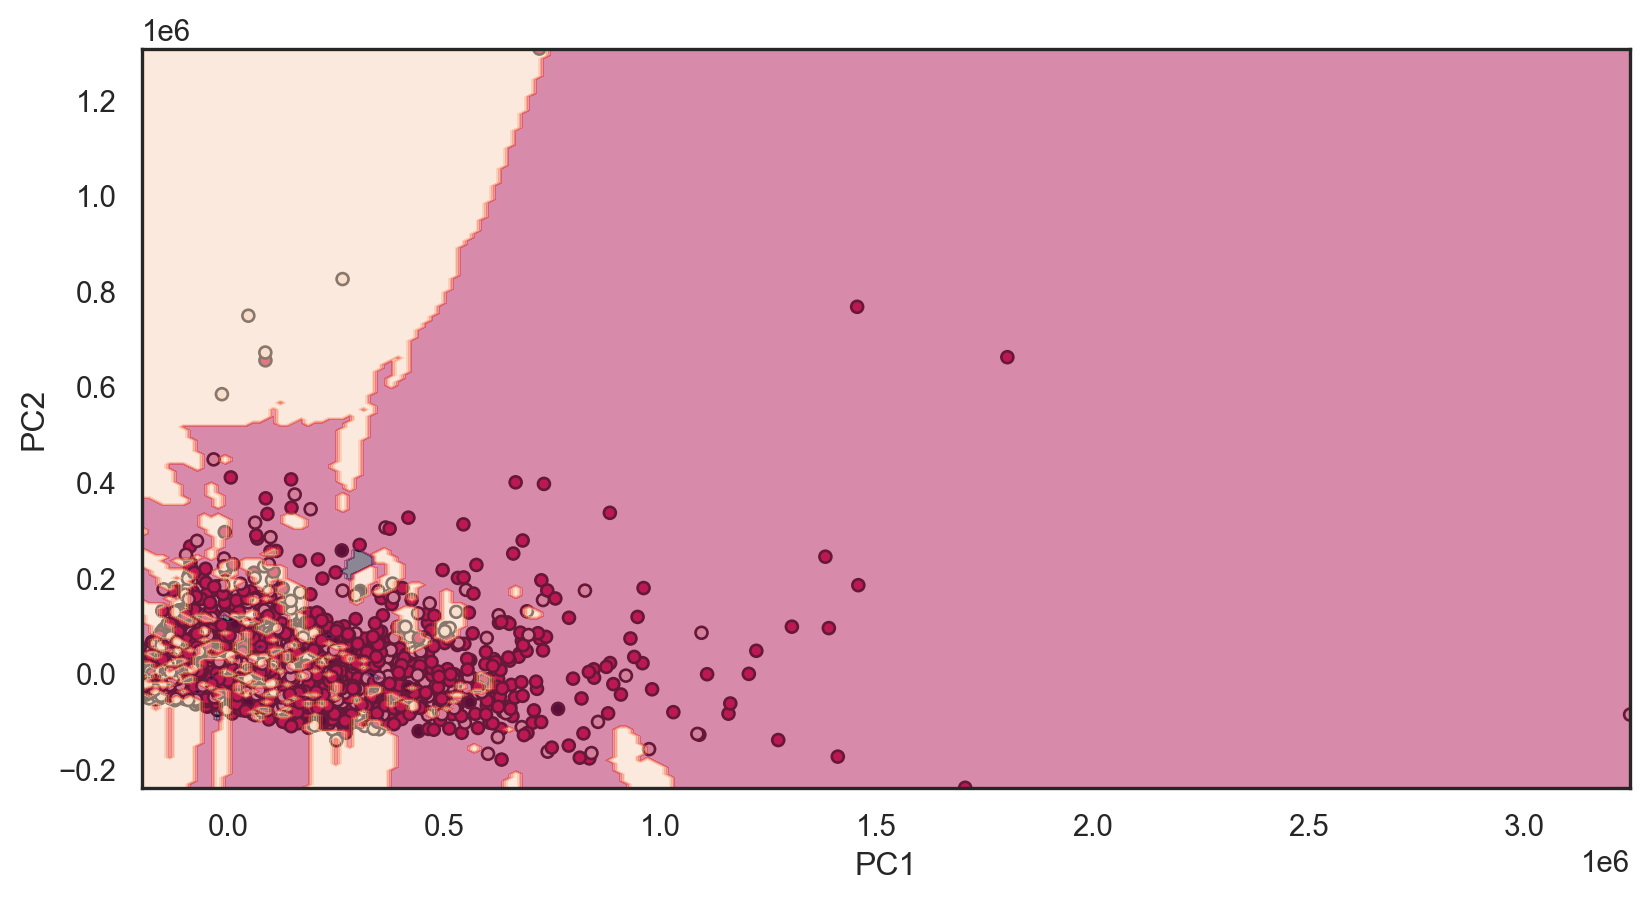

In [50]:
decisionplot(knn, pd.DataFrame(X_train_pca, columns = ['PC1', 'PC2']), y_train)
plt.show()

In [51]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train_pca, y_train)
predictions = dtree.predict(X_test_pca)
print("Decision Tree Accuracy:", round(accuracy_score(y_test, predictions), 3))

Decision Tree Accuracy: 0.484


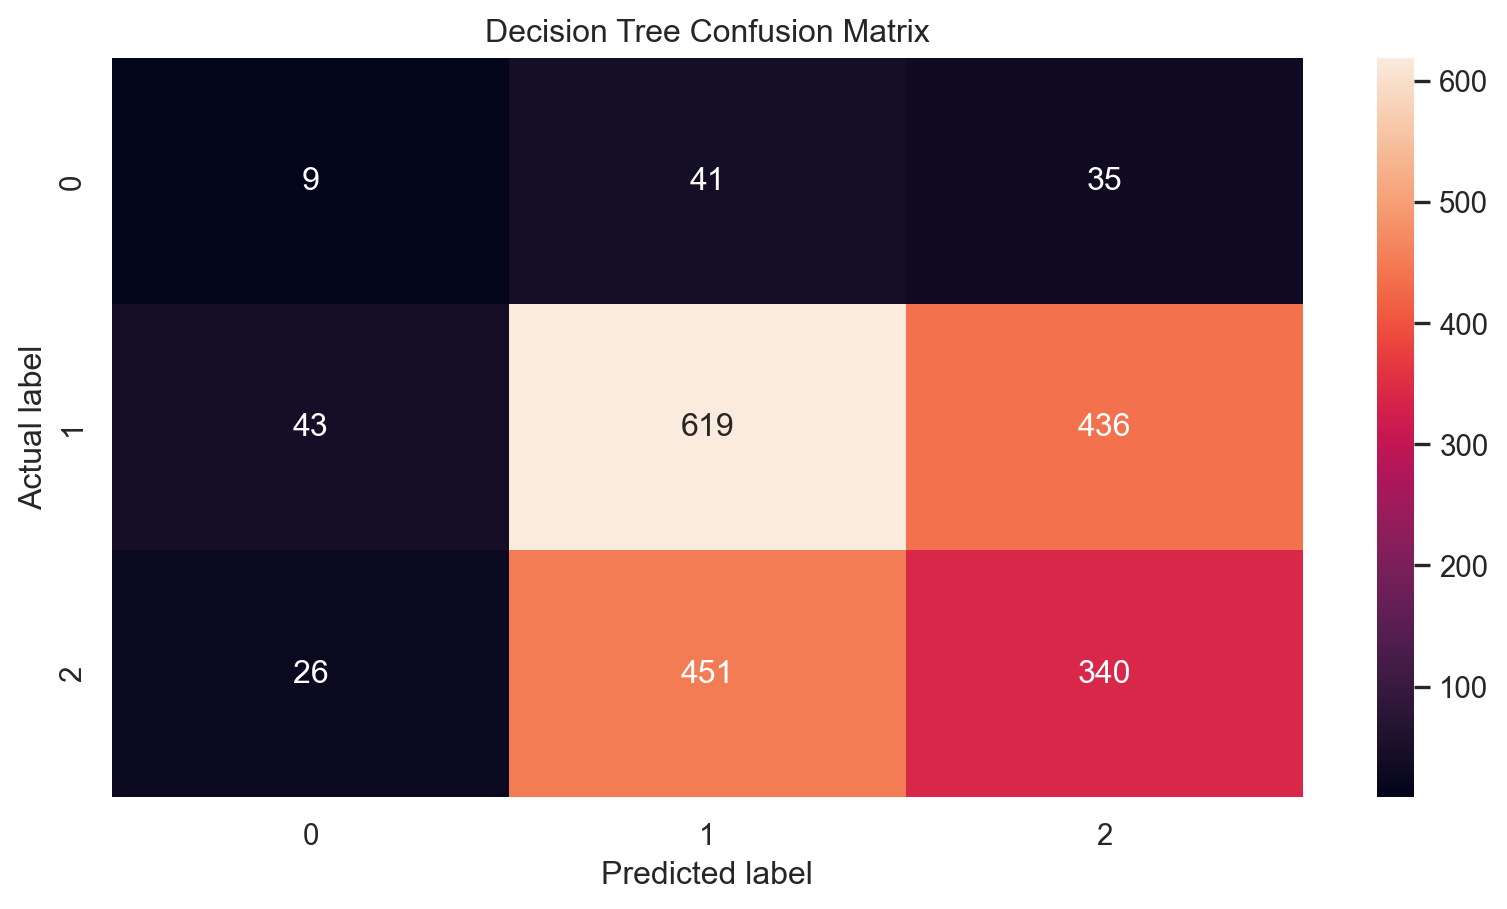

In [52]:
#| code-fold: true
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot = True, fmt = 'g')
plt.title('Decision Tree Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

/Users/johnchen/Documents/Solutions/course-website/env/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


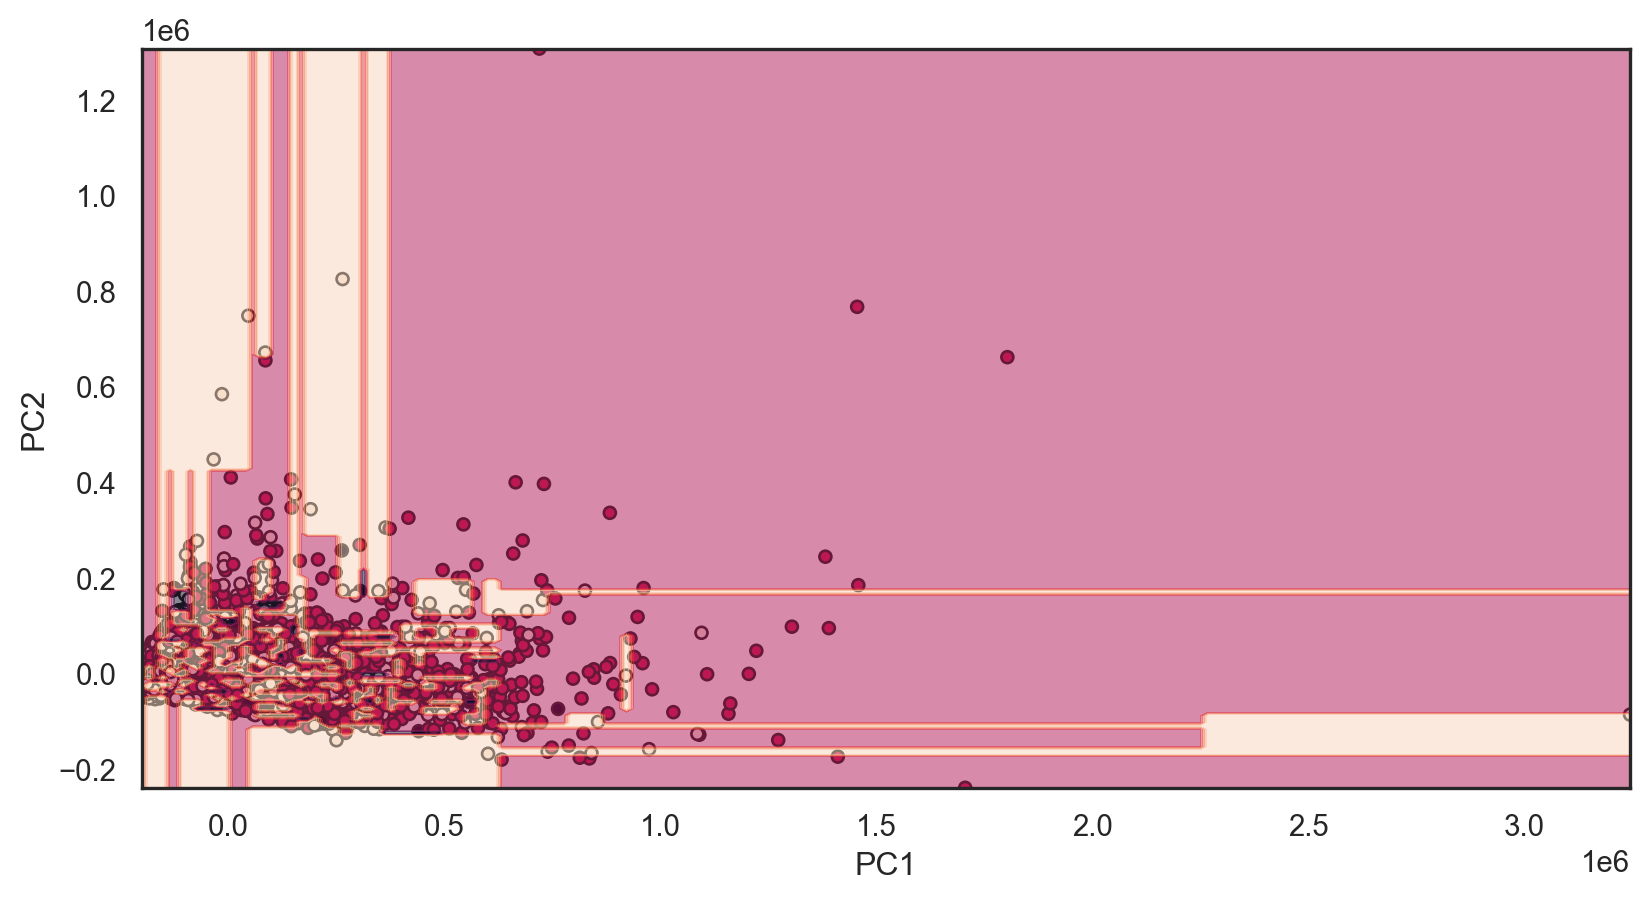

In [53]:
decisionplot(dtree, pd.DataFrame(X_train_pca, columns = ['PC1', 'PC2']), y_train)
plt.show()